In [1]:
import pandas as pd
import numpy as np
import os
from pandas_datareader import data as pdr
import datetime
import warnings
import fix_yahoo_finance as yf #pip install fix_yahoo_finance
yf.pdr_override()
import warnings
import matplotlib.pyplot as plt
import functools as ft
import pandas_talib as TA #git clone https://github.com/femtotrader/pandas_talib.git
import operator
import datetime
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
%matplotlib inline
os.chdir("/Users/Personal/Untitled Folder 2")
warnings.filterwarnings("ignore")


# Data Retrieval

In [2]:
#Downloading the Data for S&P500 Index directly from Yahoo!
start = "2012-01-01" 
end = "2017-12-17"
SPData = pdr.get_data_yahoo("^GSPC",start,end)

[*********************100%***********************]  1 of 1 downloaded


The stock prices may be highly influenced by other major financial major indexes across the world. So we can include them as features and need to get data for them. Indexes considered are FTSE100, NIKKEI225,DJIA, Frankfurt DAX, Paris CAC,Hong Kong Hang Seng, Australia AXJO and NASDAQ. Exchange rates may also influence SP500 so we can also take USD/CNY, USD/JPY,USD/EUR and USD/GBP. We also use VIX data since it incorporates information about the market volatility.

I chose to download the data from Yahoo! and fred so that anyone is able to run the whole code without worrying about the datsets.

In [21]:
#getting all the necessary data
FTSE = pdr.get_data_yahoo("^FTSE",start,end)
NIKKEI = pdr.get_data_yahoo("^N225",start,end)
DJI = pdr.get_data_yahoo("^DJI",start,end)
NASDAQ = pdr.get_data_yahoo("^IXIC",start,end)
CAC = pdr.get_data_yahoo("^FCHI",start,end)
HSI = pdr.get_data_yahoo("^HSI",start,end)
AXJO = pdr.get_data_yahoo("^AXJO",start,end)
SSE = pdr.get_data_yahoo("^SSEC",start,end)
VIX = pdr.get_data_yahoo("^VIX",start,end)
USDJPY = pdr.get_data_fred("DEXJPUS",start,end)
USDCNY = pdr.get_data_fred("DEXCHUS",start,end)
USDGBP = pdr.get_data_fred("DEXUSUK",start,end)
USDEUR = pdr.get_data_fred("DEXUSEU",start,end)
Gold = pdr.get_data_fred("GOLDPMGBD228NLBM",start,end)
#crude oil price - West Texas Intermediate
Oil = pdr.get_data_fred("DCOILWTICO",start,end)
Oil.columns = ['Price']
#It has null values, so dropping null values.
Oil.dropna(axis=0,how="all",inplace=True)

[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded
[*********************100%***********************]  1 of 1 downloaded


# Data Alignment and Merging

Renaming the columns so that we can identify different Close when we merge the data

In [18]:
SPData.rename(columns = {'Close':'SP_Close'},inplace=True)
FTSE.rename(columns = {'Close':'FTSE_Close'},inplace=True)
NIKKEI.rename(columns = {'Close':'NIKKEI_Close'},inplace=True)
DJI.rename(columns = {'Close':'DJI_Close'},inplace=True)
NASDAQ.rename(columns = {'Close':'NASDAQ_Close'},inplace=True)
CAC.rename(columns = {'Close':'CAC_Close'},inplace=True)
HSI.rename(columns = {'Close':'HSI_Close'},inplace=True)
AXJO.rename(columns = {'Close':'AXJO_Close'},inplace=True)
SSE.rename(columns = {'Close':'SSE_Close'},inplace=True)
VIX.rename(columns = {'Close':'VIX_Close'},inplace=True)
USDJPY.columns = ["USDJPY_Close"]
USDCNY.columns = ["USDCNY_Close"]
USDGBP.columns = ["USDGBP_Close"]
USDEUR.columns = ["USDEUR_Close"]
Gold.columns = ["Gold_Price"]
Oil.rename(columns = {'Price':'Oil_Price'},inplace=True)

In [19]:
Tickers = ["SP","FTSE","NIKKEI","DJI","NASDAQ","CAC","HSI","AXJO"]
dfs = [SPData,FTSE,NIKKEI,DJI,NASDAQ,CAC,HSI,AXJO]

We drop the Adjusted Close column since it would be wise to work on the Close instead of Adjusted Close. Also,since we are working on indexes Adjusted Close is equal to the Close. Please refer to this link which explains it nicely

http://www.priceactionlab.com/Blog/2011/03/chaos-in-technical-analysis-and-backtesting-part-i-close-vs-adjusted-close/

In [16]:
for df in dfs:
    df.drop(axis=1,columns="Adj Close",inplace=True)

ValueError: labels ['Adj Close'] not contained in axis

In [20]:
#List of data to be merged
Temp = [SPData,FTSE["FTSE_Close"],NIKKEI["NIKKEI_Close"],DJI["DJI_Close"],NASDAQ["NASDAQ_Close"],CAC["CAC_Close"],HSI["HSI_Close"],AXJO["AXJO_Close"],
USDJPY["USDJPY_Close"],USDCNY["USDCNY_Close"],USDGBP["USDGBP_Close"],USDEUR["USDEUR_Close"],Gold["Gold_Price"],Oil["Oil_Price"],VIX["VIX_Close"],SSE["SSE_Close"]]
MergingList = [Temp[i].to_frame() for i in range(1,len(Temp))]
MergingList.insert(0,SPData)

KeyError: 'HSI_Close'

In [10]:
Data = ft.reduce(lambda left,right: pd.merge(left,right,left_index=True,right_index=True),MergingList)

In [11]:
Data.dropna(inplace=True)

In [12]:
Data.head()

,Open,High,Low,SP_Close,Volume,FTSE_Close,NIKKEI_Close,DJI_Close,NASDAQ_Close,CAC_Close,HSI_Close,AXJO_Close,USDJPY_Close,USDCNY_Close,USDGBP_Close,USDEUR_Close,Gold_Price,Oil_Price,VIX_Close,SSE_Close
2012-01-04,1277.030029,1278.729980,1268.099976,1277.300049,-702387296,5668.500000,8560.110352,12418.419922,2648.360107,3193.649902,18727.310547,4142.700195,76.68,6.2941,1.5638,1.2930,1613.0,103.22,22.219999,2169.389893
2012-01-05,1277.300049,1283.050049,1265.260010,1281.060059,20982704,5624.299805,8488.709961,12415.700195,2669.860107,3144.909912,18813.410156,4108.500000,77.18,6.3013,1.5480,1.2783,1599.0,101.81,21.480000,2148.451904
2012-01-10,1280.770020,1296.459961,1280.770020,1292.079956,-73007296,5696.700195,8422.259766,12462.469727,2702.500000,3210.790039,19004.279297,4187.500000,76.84,6.3141,1.5489,1.2782,1637.0,102.24,20.690001,2285.743896
2012-01-11,1292.020020,1293.800049,1285.410034,1292.479980,-326847296,5670.799805,8447.879883,12449.450195,2710.760010,3204.830078,19151.939453,4181.000000,76.90,6.3149,1.5325,1.2686,1634.5,100.89,21.049999,2276.045898
2012-01-12,1292.479980,1296.819946,1285.770020,1295.500000,-275077296,5662.399902,8385.589844,12471.019531,2724.699951,3199.979980,19095.380859,4195.899902,76.76,6.3177,1.5325,1.2818,1661.0,99.03,20.469999,2275.010010


In [13]:
returns = Data[['SP_Close','FTSE_Close','NASDAQ_Close','DJI_Close','HSI_Close','NIKKEI_Close','CAC_Close','AXJO_Close','VIX_Close','SSE_Close']].pct_change()

In [14]:
returns.head()

,SP_Close,FTSE_Close,NASDAQ_Close,DJI_Close,HSI_Close,NIKKEI_Close,CAC_Close,AXJO_Close,VIX_Close,SSE_Close
2012-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05,0.002944,-0.007798,0.008118,-0.000219,0.004598,-0.008341,-0.015262,-0.008256,-0.033303,-0.009652
2012-01-10,0.008602,0.012873,0.012225,0.003767,0.010145,-0.007828,0.020948,0.019228,-0.036778,0.063903
2012-01-11,0.000310,-0.004547,0.003056,-0.001045,0.007770,0.003042,-0.001856,-0.001552,0.017400,-0.004243
2012-01-12,0.002337,-0.001481,0.005142,0.001733,-0.002953,-0.007373,-0.001513,0.003564,-0.027553,-0.000455


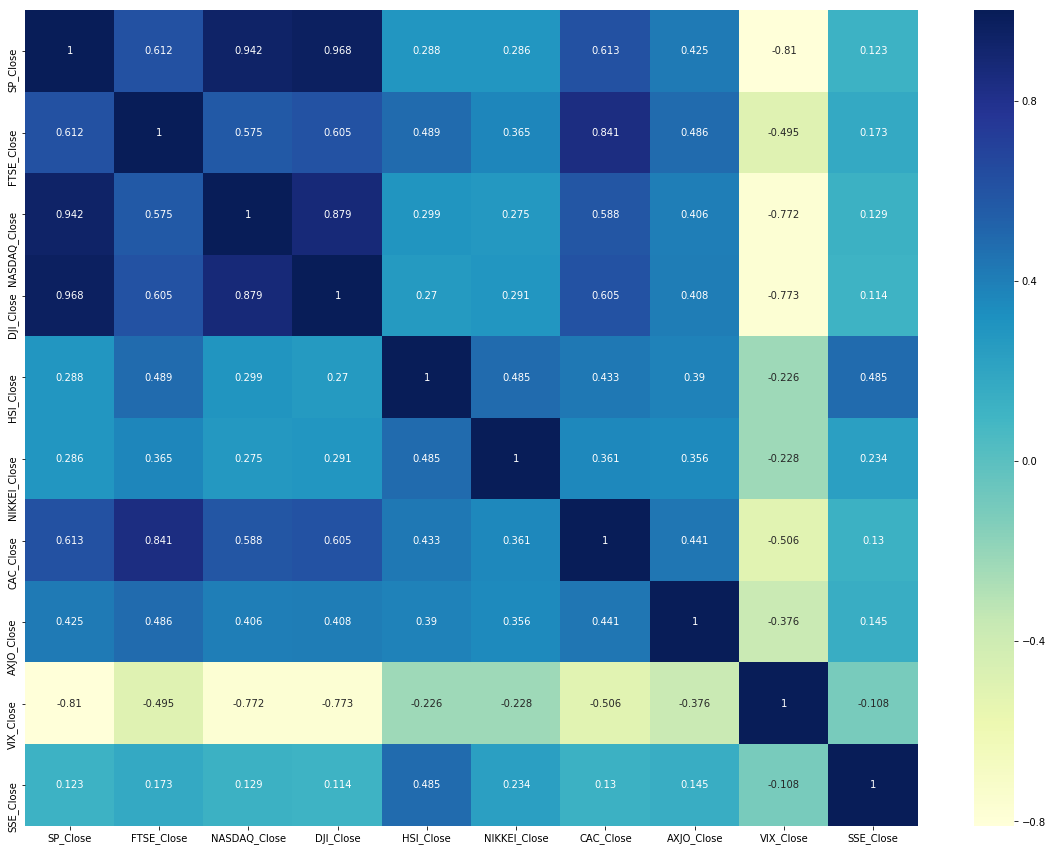

In [15]:
plt.subplots(figsize=(20,15))
sns.heatmap(returns.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

In [16]:
returns_fx = Data[['SP_Close','USDJPY_Close','USDCNY_Close','USDGBP_Close','USDEUR_Close','Gold_Price','Oil_Price']].pct_change()

In [17]:
returns_fx.head()

,SP_Close,USDJPY_Close,USDCNY_Close,USDGBP_Close,USDEUR_Close,Gold_Price,Oil_Price
2012-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05,0.002944,0.006521,0.001144,-0.010104,-0.011369,-0.008679,-0.013660
2012-01-10,0.008602,-0.004405,0.002031,0.000581,-0.000078,0.023765,0.004224
2012-01-11,0.000310,0.000781,0.000127,-0.010588,-0.007511,-0.001527,-0.013204
2012-01-12,0.002337,-0.001821,0.000443,0.000000,0.010405,0.016213,-0.018436


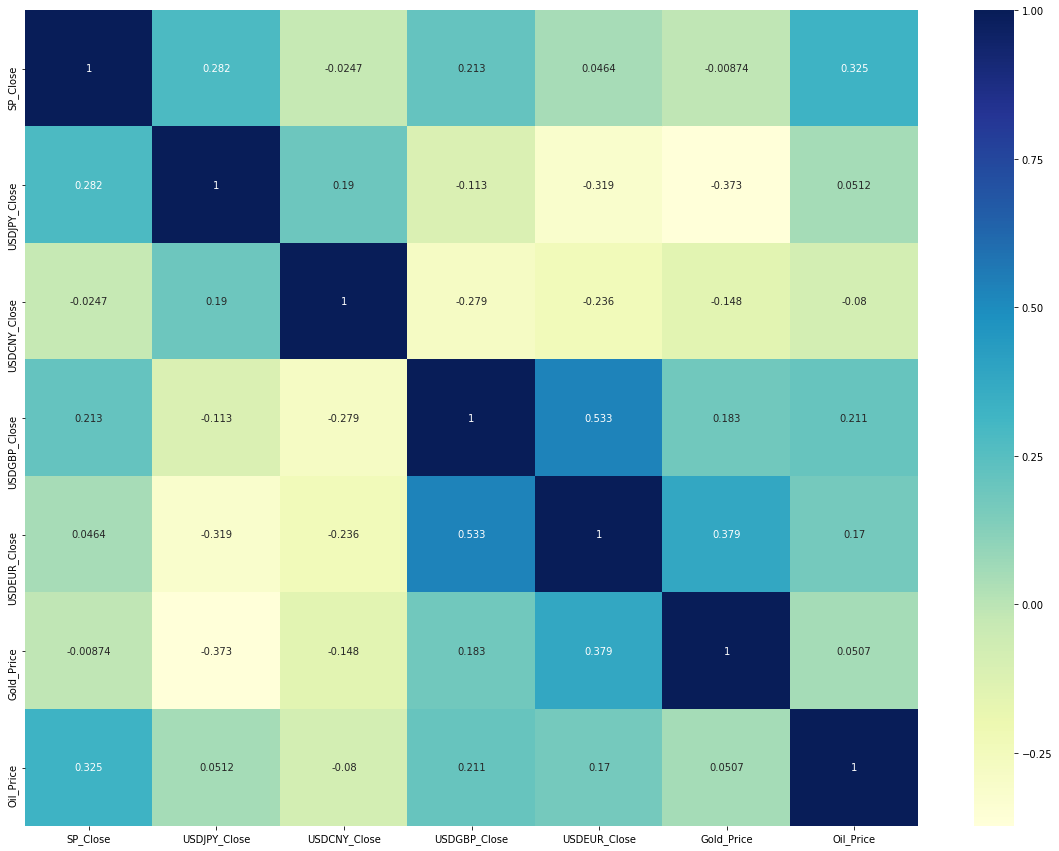

In [18]:
plt.subplots(figsize=(20,15))
sns.heatmap(returns_fx.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

I will be working with 3 Target variables which will be described shortly as follows. I got this idea from the following paper:

Application of machine learning techniques for stock market prediction by Bin Weng, Auburn University, May 6, 2017

Target 1: Close(i+1) - Close(i)

Target 2: Open(i+1) - Open(i)

Target 3: if Return > 0.0015 -> +1 else -1

In [19]:
DataTemp = Data.copy(deep=True)

# Feature Generation

In [20]:
#Function to create label 3
def target_label(x):
    if x>0.0015:
        return 1
    else:
        return -1


Technical indicators are used extensively in the industry and they speak quite well about the trend. People have successfully traded using technical indicators so I decided to use several technical indicators in my project.

In [21]:
def STOK(close, low, high, n): 
 STOK = ((close - pd.rolling_min(low, n)) / (pd.rolling_max(high, n) - pd.rolling_min(low, n))) * 100
 return STOK

In [22]:
DataTemp["STOK"] = STOK(DataTemp["SP_Close"],DataTemp["Low"],DataTemp["High"],14)

In [23]:
def STOD(close, low, high, n):
 STOK = ((close - pd.rolling_min(low, n)) / (pd.rolling_max(high, n) - pd.rolling_min(low, n))) * 100
 STOD = pd.rolling_mean(STOK, 3)
 return STOD

In [24]:
DataTemp["STOD"] = STOD(DataTemp["SP_Close"],DataTemp["Low"],DataTemp["High"],14)

In [25]:
def RSI(close, period):
    delta = close.diff().dropna()
    u = delta * 0
    d = u.copy()
    u[delta > 0] = delta[delta > 0]
    d[delta < 0] = -delta[delta < 0]
    u[u.index[period-1]] = np.mean( u[:period] ) #first value is sum of avg gains
    u = u.drop(u.index[:(period-1)])
    d[d.index[period-1]] = np.mean( d[:period] ) #first value is sum of avg losses
    d = d.drop(d.index[:(period-1)])
    rs = pd.stats.moments.ewma(u, com=period-1, adjust=False) / \
         pd.stats.moments.ewma(d, com=period-1, adjust=False)
    return 100 - 100 / (1 + rs)

In [26]:
DataTemp["RSI"] = RSI(DataTemp["SP_Close"],14)

In [27]:
def CCI(close, high, low, n, constant): 
 TP = (high + low + close) / 3 
 CCI = pd.Series((TP - pd.rolling_mean(TP, n)) / (constant * pd.rolling_std(TP, n)), name = 'CCI_' + str(n)) 
 return CCI

In [28]:
DataTemp["CCI_20"] = CCI(DataTemp["SP_Close"],DataTemp["High"],DataTemp["Low"],20,0.015)
DataTemp["CCI_10"] = CCI(DataTemp["SP_Close"],DataTemp["High"],DataTemp["Low"],10,0.015)

In [29]:
def ACCDIST(Close, High, Low, Volume, n):  
    ad = (2 * Close - High - Low) / (High - Low) * Volume  
    M = ad.diff(n - 1)  
    N = ad.shift(n - 1)  
    ROC = M / N  
    AD = pd.Series(ROC, name = 'Acc/Dist_ROC_' + str(n))    
    return AD

In [30]:
DataTemp["ACCDIST"] = ACCDIST(DataTemp["SP_Close"],DataTemp["High"],DataTemp["Low"],DataTemp["Volume"],10)

In [31]:
def MOM(Close, n):  
    M = pd.Series(Close.diff(n), name = 'Momentum_' + str(n))    
    return M

In [32]:
DataTemp["MOM_3"] = MOM(DataTemp["SP_Close"],3)
DataTemp["MOM_5"] = MOM(DataTemp["SP_Close"],5)

In [33]:
def ROC(close, n):  
    M = close.diff(n - 1)  
    N = close.shift(n - 1)  
    ROC = pd.Series(((M / N) * 100), name = 'ROC_' + str(n))   
    return ROC

In [34]:
DataTemp["ROC_3"] = ROC(DataTemp["SP_Close"],3)
DataTemp["ROC_5"] = ROC(DataTemp["SP_Close"],5)
DataTemp["ROC_7"] = ROC(DataTemp["SP_Close"],7)

In [35]:
def MA(Close,n):
    MA = pd.Series(pd.rolling_mean(Close,n),name='MA_'+str(n))
    return MA

In [36]:
DataTemp["MA_10"] = MA(DataTemp["SP_Close"],10)
DataTemp["MA_5"] = MA(DataTemp["SP_Close"],5)

In [37]:
def ForceIndex(close, volume, n): 
 FI = pd.Series(close.diff(n) * volume, name = 'ForceIndex')  
 return FI

In [38]:
DataTemp["FI"] = ForceIndex(DataTemp["SP_Close"],DataTemp["Volume"],10)

In [39]:
def EMA(close, n):  
    EMA = pd.Series(pd.ewma(close, span = n, min_periods = n - 1), name = 'EMA_' + str(n))    
    return EMA

In [40]:
DataTemp["EMA_10"] = EMA(DataTemp["SP_Close"],10)
DataTemp["EMA_7"] = EMA(DataTemp["SP_Close"],7)

In [41]:
def EOM(High,Low,Volume,n):  
    EoM = (High.diff(1) + Low.diff(1)) * (High - Low) / (2 * Volume)  
    Eom_ma = pd.Series(pd.rolling_mean(EoM, n), name = 'EoM_' + str(n))  
    return Eom_ma

In [42]:
DataTemp["EOM"] = EOM(DataTemp["High"],DataTemp["Low"],DataTemp["Volume"],10)

In [43]:
def STDDEV(close, n):  
    stddev = pd.Series(pd.rolling_std(close, n), name = 'STD_' + str(n)) 
    return stddev

In [44]:
DataTemp["STDDEV_10"] = STDDEV(DataTemp["SP_Close"],10)
DataTemp["STDDEV_21"] = STDDEV(DataTemp["SP_Close"],21)

In [45]:
def Chaikin(close,high,low,volume):  
    ad = (2 * close - high - low) / (high - low) * volume 
    Chaikin = pd.Series(pd.ewma(ad, span = 3, min_periods = 2) - pd.ewma(ad, span = 10, min_periods = 9), name = 'Chaikin')   
    return Chaikin

In [46]:
DataTemp["Chaikin"] = Chaikin(DataTemp["SP_Close"],DataTemp["High"],DataTemp["Low"],DataTemp["Volume"])

In [47]:
DataTemp["Target1"] = np.sign(DataTemp["SP_Close"].diff()).shift(-1)
DataTemp["Target2"] = np.sign(DataTemp["Open"].diff()).shift(-1)
DataTemp["Target3"] = DataTemp["SP_Close"].pct_change().apply(target_label).shift(-1)
DataTemp.ix[DataTemp.Target2==0, 'Target2'] = 1

Since we want to trade at the open of the market. We cannot use the features such as low,high, volume, etc. but we can definitely use the returns of the other indices since they trade before US market and will affect US market

In [50]:
DataTemp["Open_Change"] = DataTemp["Open"].pct_change()
DataTemp["High_Change"] = DataTemp["High"].pct_change()
DataTemp["Volume_Change"] = DataTemp["Volume"].pct_change()
DataTemp["Low_Change"] = DataTemp["Low"].pct_change()

In [51]:
#Calculating Returns
ReturnsList = [i for i in DataTemp.columns if any(['_Close' in i,'_Price' in i])]
for i in ReturnsList:
    DataTemp[i.split("_")[0]+"_Returns"] = DataTemp[i].pct_change()
Drop = [i for i in DataTemp.columns if any(["_Price" in i,"_Close" in i])]
DataTemp.drop(Drop,axis=1,inplace=True)

In [52]:
DataTemp.dropna(inplace=True)
ColsList = list(DataTemp.columns)
ColsList.pop(ColsList.index("Target1"))
ColsList.pop(ColsList.index("Target2"))
ColsList.pop(ColsList.index("Target3"))
DataTemp = DataTemp[ColsList+["Target1"]+["Target2"]+["Target3"]]

In [53]:
DataTemp.dropna(inplace=True)

In [54]:
DataTemp.head()

,Open,High,Low,Volume,STOK,STOD,RSI,CCI_20,CCI_10,ACCDIST,...,USDCNY_Returns,USDGBP_Returns,USDEUR_Returns,Gold_Returns,Oil_Returns,VIX_Returns,SSE_Returns,Target1,Target2,Target3
2012-02-21,1361.219971,1367.760010,1358.109985,-499767296,91.749595,90.351816,87.318573,98.350512,112.377976,-11.268513,...,-0.000857,0.000063,0.011060,0.020432,0.034692,-0.053590,0.010425,-1.0,1.0,-1.0
2012-02-22,1362.109985,1362.699951,1355.530029,-661257296,84.985918,91.765000,82.177293,82.025326,88.607467,-1.295814,...,0.000000,-0.007534,-0.000302,0.002288,0.001039,0.000000,0.009304,1.0,-1.0,1.0
2012-02-23,1357.530029,1364.239990,1352.280029,-508517296,92.958827,89.898113,83.510151,78.515397,84.268153,0.192420,...,0.000318,0.001467,0.004302,0.014269,0.013681,-0.076416,0.002483,1.0,1.0,1.0
2012-02-27,1365.199951,1371.939941,1354.920044,-646077296,92.687887,90.210878,84.404530,84.698728,104.819058,1.068629,...,0.000508,0.009236,0.007665,-0.002814,0.009773,0.082738,0.015564,1.0,1.0,1.0
2012-02-28,1367.560059,1373.089966,1365.969971,-715847296,98.233867,94.626861,85.355228,93.439310,115.281239,11.261317,...,-0.000365,0.002651,0.003132,0.005079,-0.017513,-0.012644,0.001962,-1.0,1.0,-1.0


In [55]:
DataTemp.columns

Index(['Open', 'High', 'Low', 'Volume', 'STOK', 'STOD', 'RSI', 'CCI_20',
       'CCI_10', 'ACCDIST', 'MOM_3', 'MOM_5', 'ROC_3', 'ROC_5', 'ROC_7',
       'MA_10', 'MA_5', 'FI', 'EMA_10', 'EMA_7', 'EOM', 'STDDEV_10',
       'STDDEV_21', 'Chaikin', 'Open_Change', 'High_Change', 'Volume_Change',
       'Low_Change', 'SP_Returns', 'FTSE_Returns', 'NIKKEI_Returns',
       'DJI_Returns', 'NASDAQ_Returns', 'CAC_Returns', 'HSI_Returns',
       'AXJO_Returns', 'USDJPY_Returns', 'USDCNY_Returns', 'USDGBP_Returns',
       'USDEUR_Returns', 'Gold_Returns', 'Oil_Returns', 'VIX_Returns',
       'SSE_Returns', 'Target1', 'Target2', 'Target3'],
      dtype='object')

In [56]:
DataTemp.columns[:-3]

Index(['Open', 'High', 'Low', 'Volume', 'STOK', 'STOD', 'RSI', 'CCI_20',
       'CCI_10', 'ACCDIST', 'MOM_3', 'MOM_5', 'ROC_3', 'ROC_5', 'ROC_7',
       'MA_10', 'MA_5', 'FI', 'EMA_10', 'EMA_7', 'EOM', 'STDDEV_10',
       'STDDEV_21', 'Chaikin', 'Open_Change', 'High_Change', 'Volume_Change',
       'Low_Change', 'SP_Returns', 'FTSE_Returns', 'NIKKEI_Returns',
       'DJI_Returns', 'NASDAQ_Returns', 'CAC_Returns', 'HSI_Returns',
       'AXJO_Returns', 'USDJPY_Returns', 'USDCNY_Returns', 'USDGBP_Returns',
       'USDEUR_Returns', 'Gold_Returns', 'Oil_Returns', 'VIX_Returns',
       'SSE_Returns'],
      dtype='object')

In [57]:
pca = PCA()
pca.fit(DataTemp)
print(pca.explained_variance_)


[1.68737925e+21 3.54497004e+17 4.03501049e+16 7.03740496e+05
 1.25093072e+04 1.01110239e+03 9.79543483e+02 5.05871135e+02
 2.87684463e+02 1.84398282e+02 1.45743622e+02 1.05094204e+02
 9.39893023e+01 5.52814675e+01 3.64362401e+01 2.35718216e+01
 2.01841059e+01 1.77410561e+01 1.01361160e+01 3.39282144e+00
 1.78725757e+00 5.43851478e-01 4.90644929e-01 4.28201993e-01
 2.61574704e-01 1.66913188e-01 4.14497572e-02 2.73971961e-03
 5.27829749e-04 3.07594293e-04 1.92114699e-04 1.28673727e-04
 1.08919302e-04 6.48018607e-05 5.31567633e-05 4.79926747e-05
 3.54213430e-05 2.50661807e-05 2.00044170e-05 1.84448583e-05
 1.10303007e-05 9.52228658e-06 7.03081745e-06 2.72235875e-06
 2.35410622e-06 9.50484637e-07 1.68260416e-11]


In [61]:
returns2 = DataTemp[['Open', 'High', 'Low', 'Volume', 'STOK', 'STOD', 'RSI', 'CCI_20',
       'CCI_10', 'ACCDIST', 'MOM_3', 'MOM_5', 'ROC_3', 'ROC_5', 'ROC_7',
       'MA_10', 'MA_5', 'FI', 'EMA_10', 'EMA_7', 'EOM', 'STDDEV_10',
       'STDDEV_21', 'Chaikin', 'Open_Change', 'High_Change', 'Volume_Change',
       'Low_Change', 'SP_Returns', 'FTSE_Returns', 'NIKKEI_Returns',
       'DJI_Returns', 'NASDAQ_Returns', 'CAC_Returns', 'HSI_Returns',
       'AXJO_Returns', 'USDJPY_Returns', 'USDCNY_Returns', 'USDGBP_Returns',
       'USDEUR_Returns', 'Gold_Returns', 'Oil_Returns', 'VIX_Returns',
       'SSE_Returns', 'Target1', 'Target2', 'Target3']].pct_change()

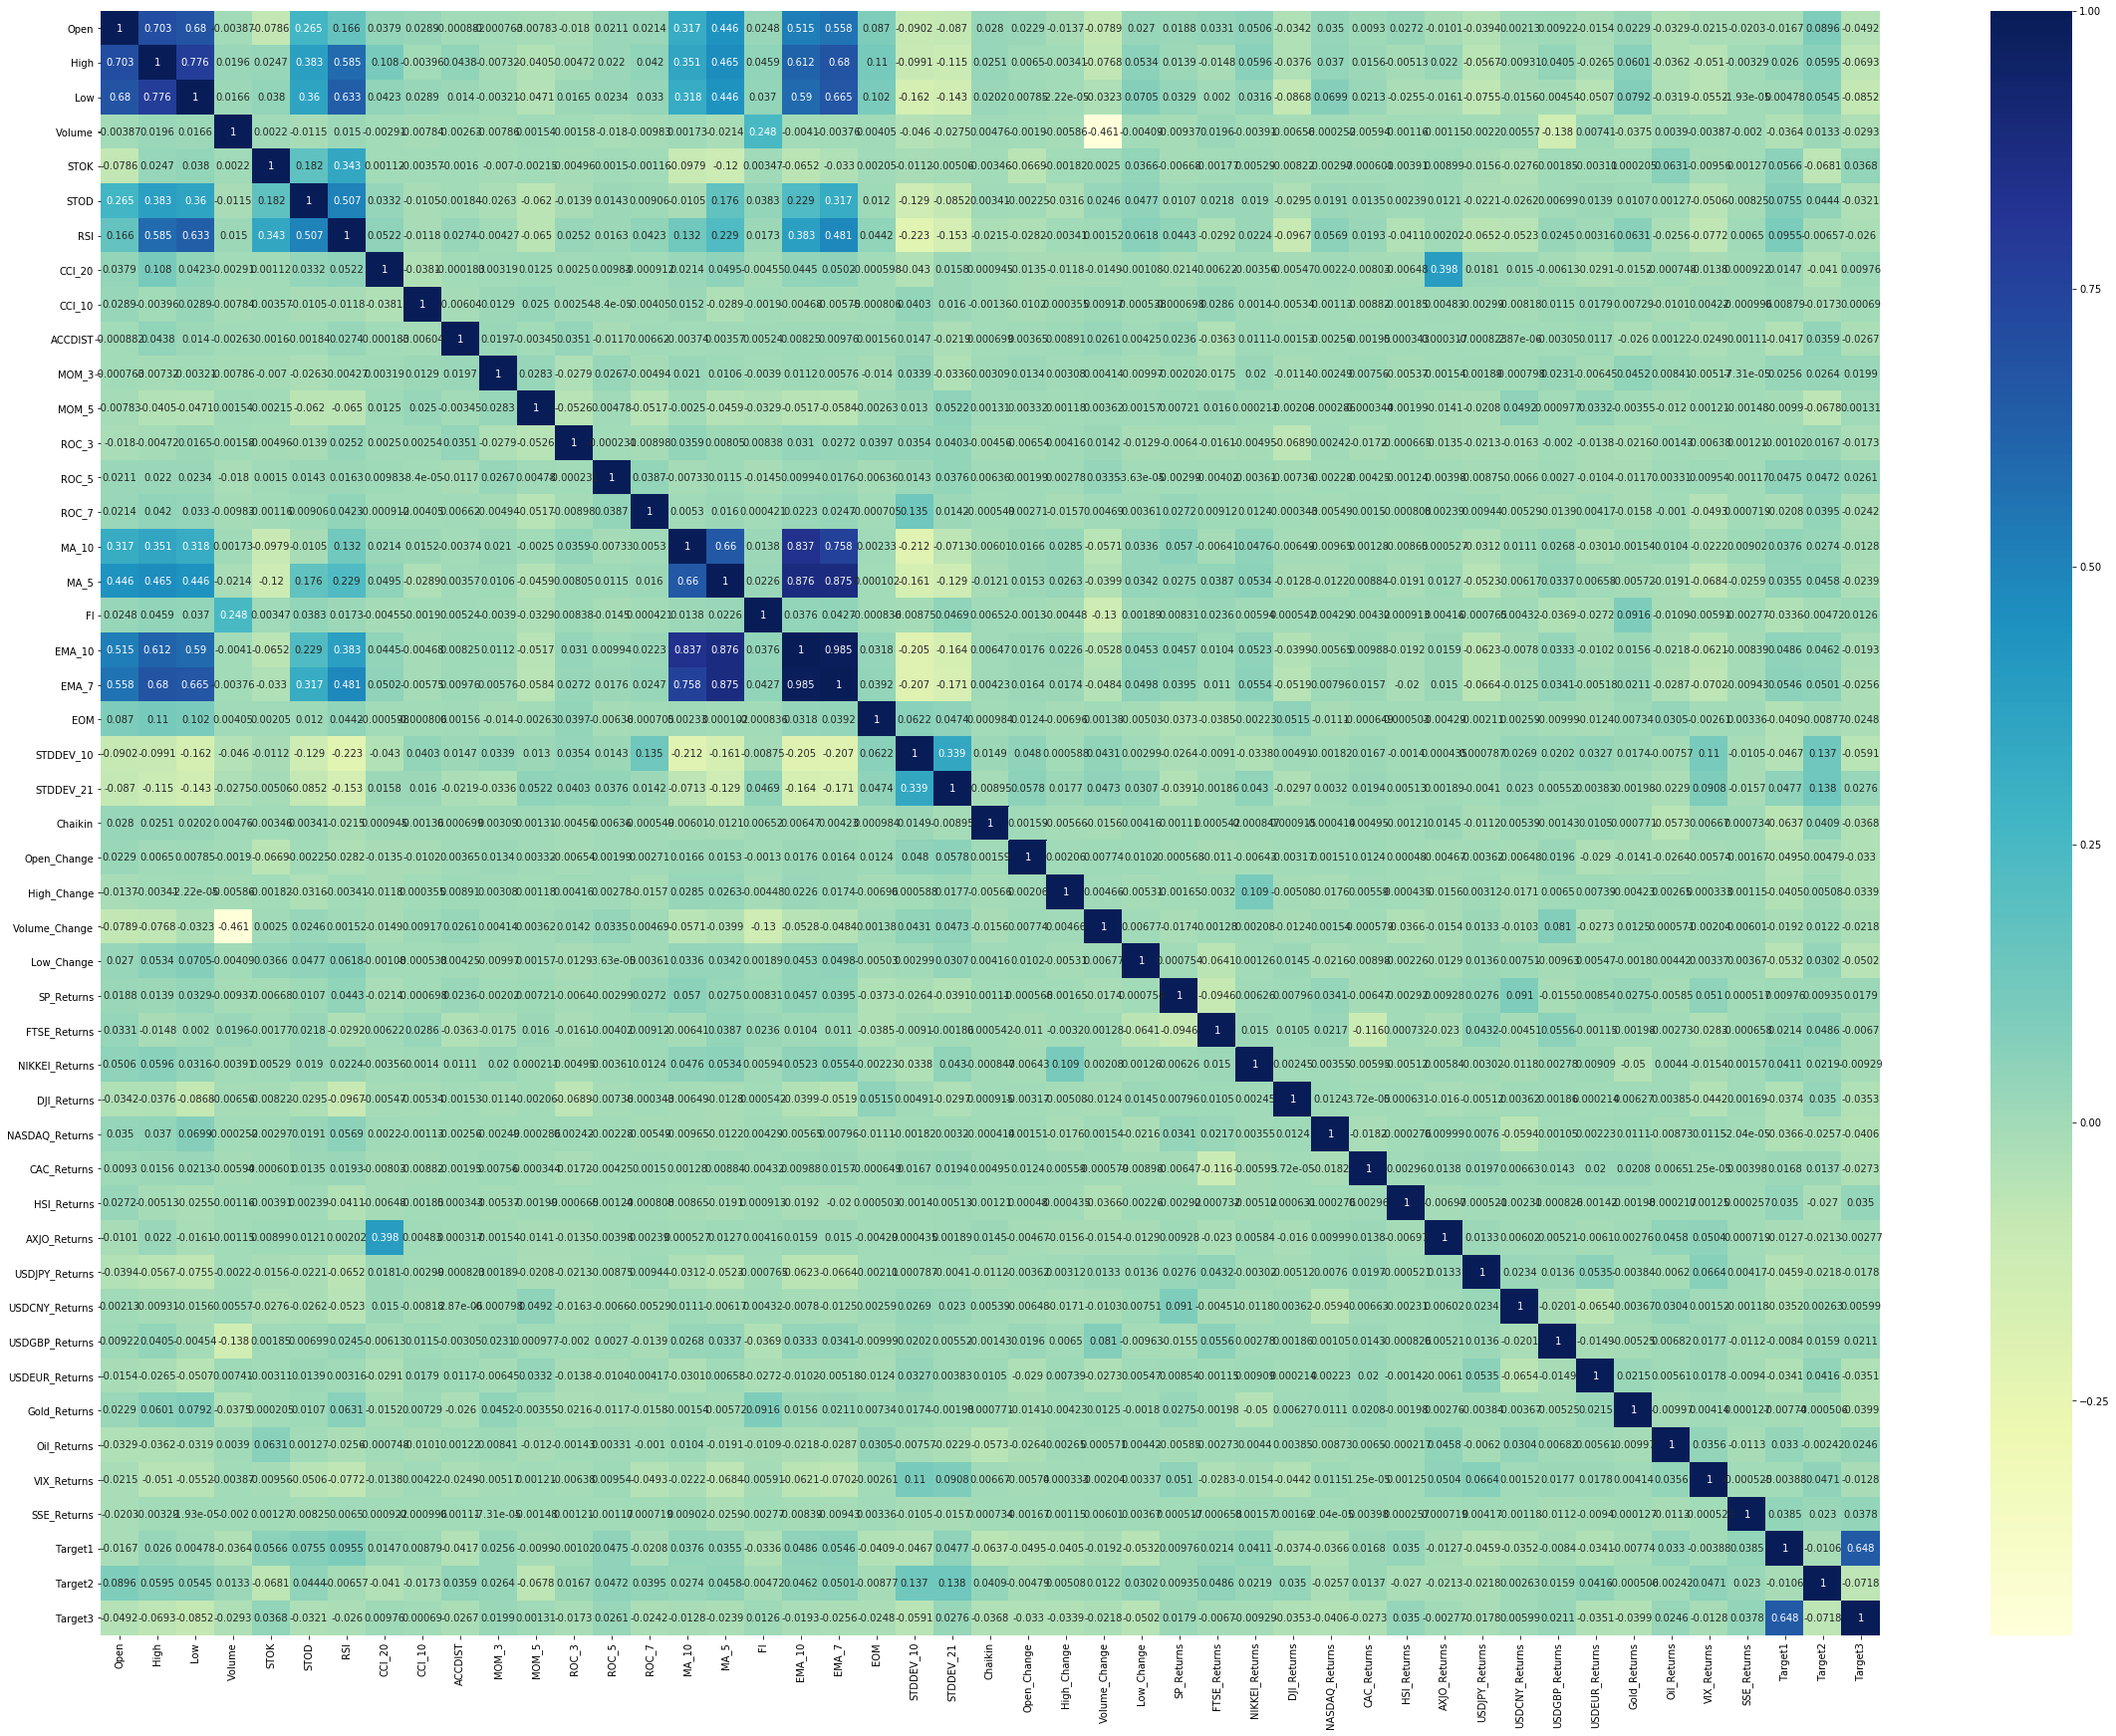

In [62]:
plt.subplots(figsize=(40,30))
sns.heatmap(returns2.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

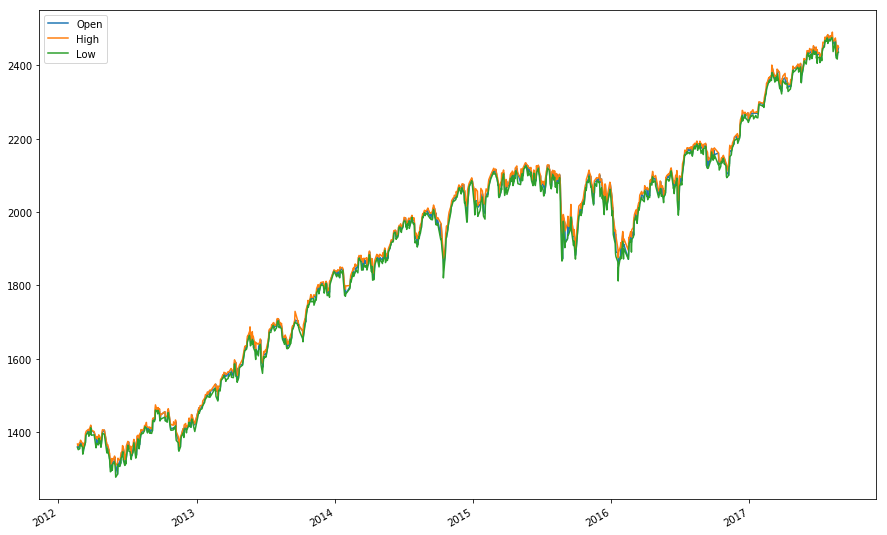

In [94]:
DataTemp[['Open', 'High', 'Low']].plot(legend=True, figsize=(15,10))

In [69]:
#creating helper functions to use them for classification
from sklearn.svm import LinearSVC
def LinearSVM(X_train, y_train, X_test, y_test, parameters):
    clf=LinearSVC(loss="hinge",C=parameters[0])
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)
    return clf, accuracy

from sklearn.ensemble import RandomForestClassifier
def RandomForest(X_train, y_train, X_test, y_test, parameters):
    clf = RandomForestClassifier(n_estimators=parameters[0],n_jobs=-1)
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)
    return clf, accuracy

from sklearn.linear_model import LogisticRegression
def LogRegress(X_train, y_train, X_test, y_test, parameters):
    clf = LogisticRegression(C=parameters[0])
    clf.fit(X_train,y_train)
    accuracy = clf.score(X_test,y_test)
    return clf, accuracy

from sklearn import neighbors
def KNN(X_train, y_train, X_test, y_test, parameters):
    clf = neighbors.KNeighborsClassifier(n_neighbors=parameters[0])
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)
    return clf,accuracy

from sklearn.naive_bayes import GaussianNB
def GNB(X_train, y_train, X_test, y_test):
    clf = GaussianNB()
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)
    return clf,accuracy

from sklearn.ensemble import AdaBoostClassifier
def AdaBoost(X_train, y_train, X_test, y_test, parameters):
    n = parameters[0]
    l =  parameters[1]
    clf = AdaBoostClassifier(n_estimators = n, learning_rate = l)
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)
    return clf, accuracy

In [64]:
def mask(df, features,y,start_test):
    '''
    To separate dataset and get X_train, X_test, y_train, y_test
    '''
    X=df[features]
    y=df[y]
    X_train = X[X.index < start_test]
    y_train = y[y.index < start_test]    
    X_test = X[X.index >= start_test]    
    y_test = y[y.index >= start_test]
    return X_train, y_train, X_test, y_test 

def classifier(X_train, y_train, X_test, y_test, method, parameters):
    '''
    To call different classifiers
    '''
    if method == 'RF':   
        return RandomForest(X_train, y_train, X_test, y_test, parameters)
    elif method == 'SVM':   
        return LinearSVM(X_train, y_train, X_test, y_test, parameters)
    elif method == 'LOG':
        return LogRegress(X_train, y_train, X_test, y_test, parameters)
    elif method == 'KNN':
        return KNN(X_train, y_train, X_test, y_test, parameters)
    elif method == 'GNB':
        return GNB(X_train, y_train, X_test, y_test)
    elif method == 'ADA':
        return AdaBoost(X_train, y_train, X_test, y_test, parameters)


#In time series, we cannot shuffle the dataset, we have to incrementally validate. 
#In the below function we split the data into k folds. As we move forward we train our data on all the previous data 
#available. So for example we will use the first fold on first iteration and test on fold 2. For second
#iteration we will train our model on fold 1+ fold2 and test on fold 3 and so on. So as we move forward we make
#sure that all past information is incorporated
def CV(X_train, y_train, folds, method, parameter):
    '''
    To get the average score of cross validation
    
    '''
    k = int(np.floor(float(X_train.shape[0])/folds))
    acc = np.zeros(folds-1)
    for i in range(2, folds+1):
        split = float(i-1)/i
        data = X_train[:(k*i)]
        output = y_train[:(k*i)]
        index = int(np.floor(data.shape[0]*split))
        X_tr = data[:index]        
        y_tr = output[:index]
        X_te = data[(index+1):]
        y_te = output[(index+1):]        
        acc[i-2] = classifier(X_tr, y_tr, X_te, y_te, method, parameter)[1]
    return acc.mean()  

#the below function searches for the best parameter
def SearchGrid(X_train, y_train, folds, method, grid):
    '''
    To get the best parameters for a given classifier
    '''
    param = list(grid.keys())
    finalGrid = {}
    if len(param) == 1:
        for value_0 in grid[param[0]]:
            parameters = [value_0]
            accuracy = CV(X_train, y_train, folds, method, parameters)
            finalGrid[accuracy] = parameters
        final = sorted(finalGrid.items(), key=operator.itemgetter(0), reverse=True)          
        return final[0]
    elif len(param) == 2:
        for value_0 in grid[param[0]]:
            for value_1 in grid[param[1]]:
                parameters = [value_0, value_1]
                accuracy = CV(X_train, y_train, folds,method, parameters)
                finalGrid[accuracy] = parameters
        final = sorted(finalGrid.items(), key=operator.itemgetter(0), reverse=True)
        return final[0]
 
#this function below searches for the best classifier
def cv_optimize(X_train, y_train, X_test, y_test, folds, method, grid):
    '''
    Return to a best classifier
    '''
    if grid==[]:
        best=classifier(X_train, y_train, X_test, y_test, method, grid)
    else:
        param=SearchGrid(X_train, y_train, folds, method, grid)[1]
        best=classifier(X_train, y_train, X_test, y_test, method, param)
    return best[0]

In [65]:
#plot ROC curve
from sklearn.metrics import roc_curve, auc
def make_roc(name, clf, ytest, xtest, ax=None, labe=5, proba=True, skip=0):
    initial=False
    if not ax:
        ax=plt.gca()
        initial=True
    if proba:
        fpr, tpr, thresholds=roc_curve(ytest, clf.predict_proba(xtest)[:,1])
    else:
        fpr, tpr, thresholds=roc_curve(ytest, clf.decision_function(xtest))
    roc_auc = auc(fpr, tpr)
    if skip:
        l=fpr.shape[0]
        ax.plot(fpr[0:l:skip], tpr[0:l:skip], '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    else:
        ax.plot(fpr, tpr, '.-', alpha=0.3, label='ROC curve for %s (area = %0.2f)' % (name, roc_auc))
    label_kwargs = {}
    label_kwargs['bbox'] = dict(boxstyle='round,pad=0.3', alpha=0.2,)
    if labe!=None:
        for k in range(0, fpr.shape[0],labe):
            threshold = str(np.round(thresholds[k], 2))
            ax.annotate(threshold, (fpr[k], tpr[k]), **label_kwargs)
    if initial:
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlim([0.0, 1.0])
        ax.set_ylim([0.0, 1.05])
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('ROC')
    ax.legend(loc="lower right")
    return ax

In [66]:
predict=datetime.datetime(2017,1,1)

# Label 1: Close

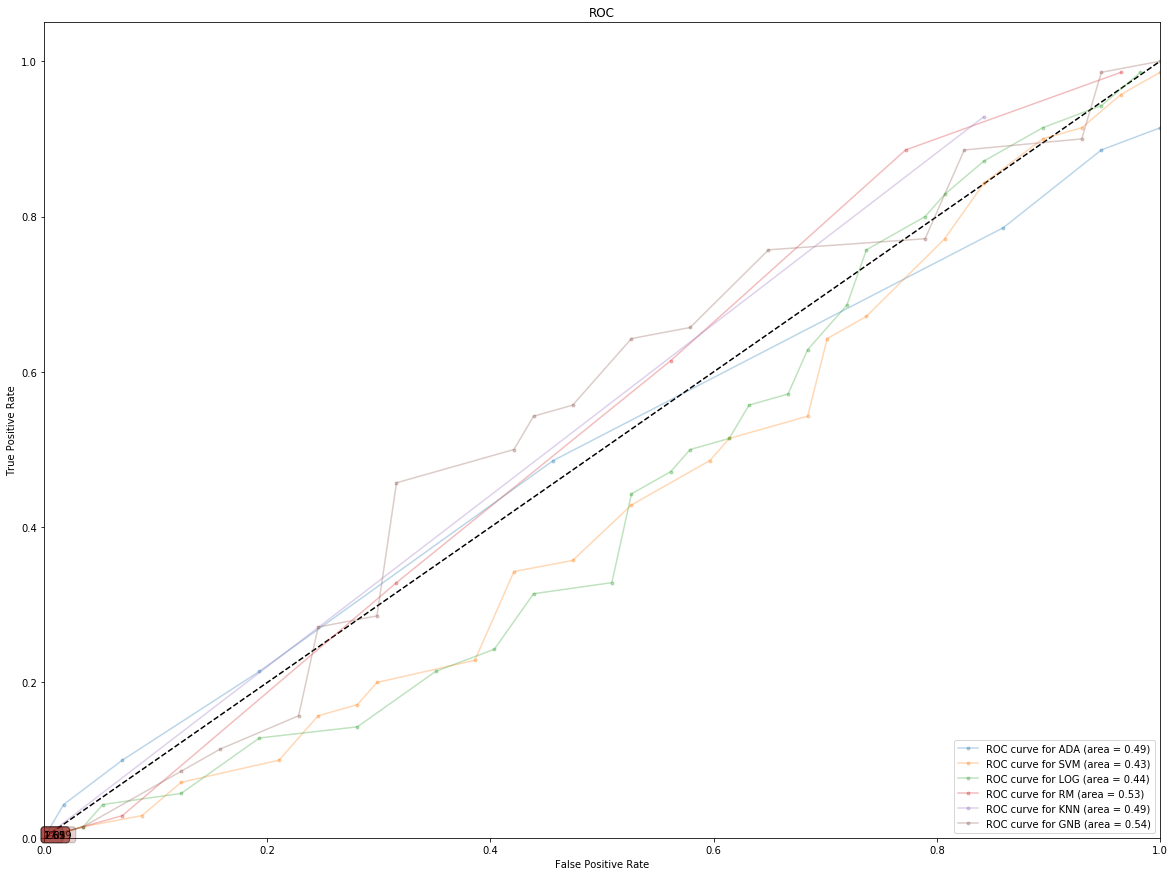

In [70]:
X_train, y_train, X_test, y_test=mask(DataTemp,['Open', 'High', 'Low', 'Volume', 'STOK', 'STOD', 'RSI', 'CCI_20',
       'CCI_10', 'ACCDIST', 'MOM_3', 'MOM_5', 'ROC_3', 'ROC_5', 'ROC_7',
       'MA_10', 'MA_5', 'FI', 'EMA_10', 'EMA_7', 'EOM', 'STDDEV_10',
       'STDDEV_21', 'Chaikin', 'Open_Change', 'High_Change', 'Volume_Change',
       'Low_Change', 'SP_Returns', 'FTSE_Returns', 'NIKKEI_Returns',
       'DJI_Returns', 'NASDAQ_Returns', 'CAC_Returns', 'HSI_Returns',
       'AXJO_Returns', 'USDJPY_Returns', 'USDCNY_Returns', 'USDGBP_Returns',
       'USDEUR_Returns', 'Gold_Returns', 'Oil_Returns', 'VIX_Returns',
       'SSE_Returns'],'Target1', predict)
ada=cv_optimize(X_train, y_train, X_test, y_test,10, 'ADA',{'n_estimators':[10,20,50],'learning_rate':[0.8,1.0,1.2]})
log=cv_optimize(X_train, y_train, X_test, y_test, 10, 'LOG', {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]})
svm=cv_optimize(X_train, y_train, X_test, y_test, 10, 'SVM', {"C": [0.01, 0.1, 1.0, 10.0, 100.0]})
rm=cv_optimize(X_train, y_train, X_test, y_test, 10, 'RF', {"n_estimators": [10,20,50,100]})
knn=cv_optimize(X_train, y_train, X_test, y_test, 10, 'KNN', {"n_neighbors": [3,5,7,9,11,13]})
gnb=cv_optimize(X_train,y_train,X_test, y_test, 10,'GNB',[])
plt.subplots(figsize=(20,15))
with sns.hls_palette(8, l=.3, s=.8):
    ax=make_roc("ADA",ada, y_test, X_test, labe=100, skip=3,proba=True)
    make_roc("SVM",svm, y_test, X_test, ax,labe=100, skip=3,proba=False)
    make_roc("LOG",log, y_test, X_test, ax,labe=100, skip=3,proba=True)
    make_roc("RM",rm,y_test, X_test,ax,labe=100, skip=3,proba=True)
    make_roc("KNN",knn,y_test, X_test,ax,labe=100, skip=3,proba=True)
    make_roc("GNB",gnb,y_test, X_test,ax,labe=100, skip=3,proba=True)

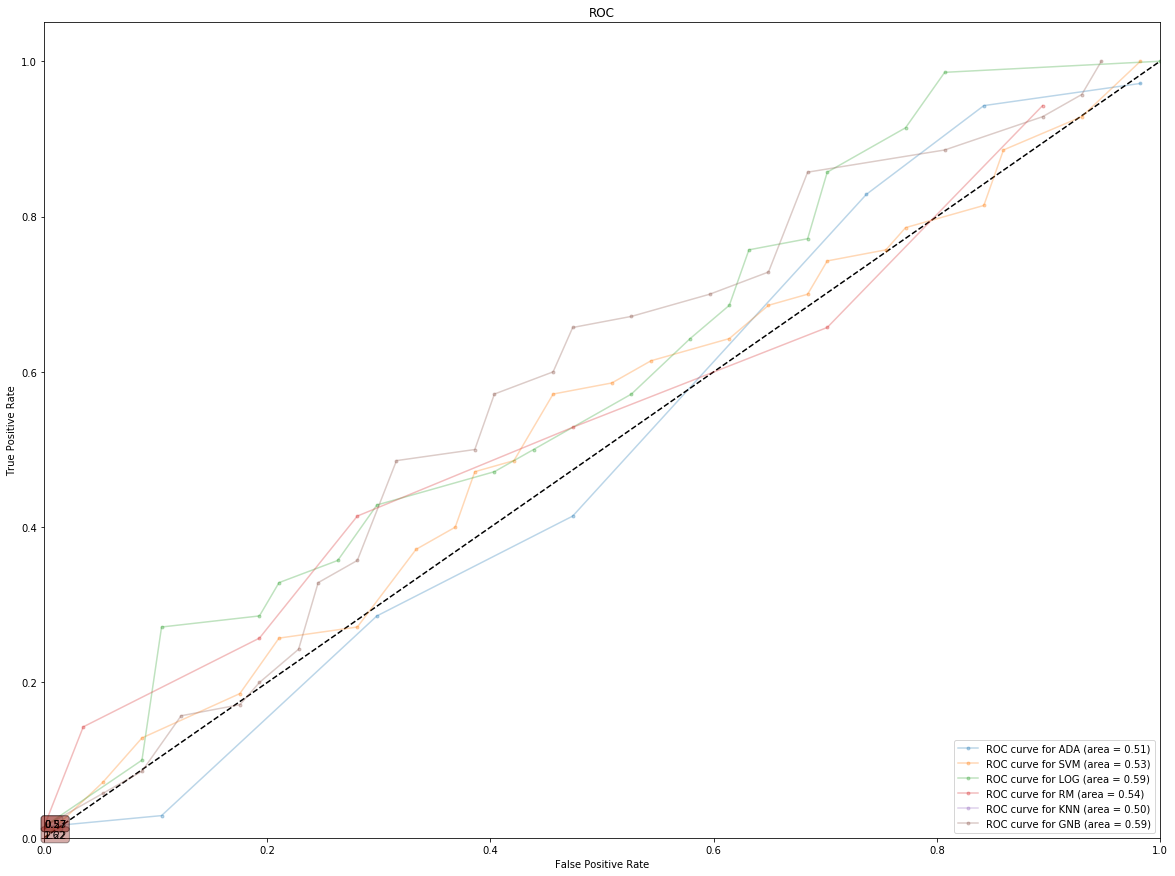

In [71]:
X_train, y_train, X_test, y_test=mask(DataTemp,['Open', 'High', 'Low', 'STOD', 'RSI','MA_10', 'MA_5','EMA_10', 'EMA_7'],'Target1', predict)
ada=cv_optimize(X_train, y_train, X_test, y_test,10, 'ADA',{'n_estimators':[10,20,50],'learning_rate':[0.8,1.0,1.2]})
log=cv_optimize(X_train, y_train, X_test, y_test, 10, 'LOG', {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]})
svm=cv_optimize(X_train, y_train, X_test, y_test, 10, 'SVM', {"C": [0.01, 0.1, 1.0, 10.0, 100.0]})
rm=cv_optimize(X_train, y_train, X_test, y_test, 10, 'RF', {"n_estimators": [10,20,50,100]})
knn=cv_optimize(X_train, y_train, X_test, y_test, 10, 'KNN', {"n_neighbors": [3,5,7,9,11,13]})
gnb=cv_optimize(X_train,y_train,X_test, y_test, 10,'GNB',[])
plt.subplots(figsize=(20,15))
with sns.hls_palette(8, l=.3, s=.8):
    ax=make_roc("ADA",ada, y_test, X_test, labe=100, skip=3,proba=True)
    make_roc("SVM",svm, y_test, X_test, ax,labe=100, skip=3,proba=False)
    make_roc("LOG",log, y_test, X_test, ax,labe=100, skip=3,proba=True)
    make_roc("RM",rm,y_test, X_test,ax,labe=100, skip=3,proba=True)
    make_roc("KNN",knn,y_test, X_test,ax,labe=100, skip=3,proba=True)
    make_roc("GNB",gnb,y_test, X_test,ax,labe=100, skip=3,proba=True)

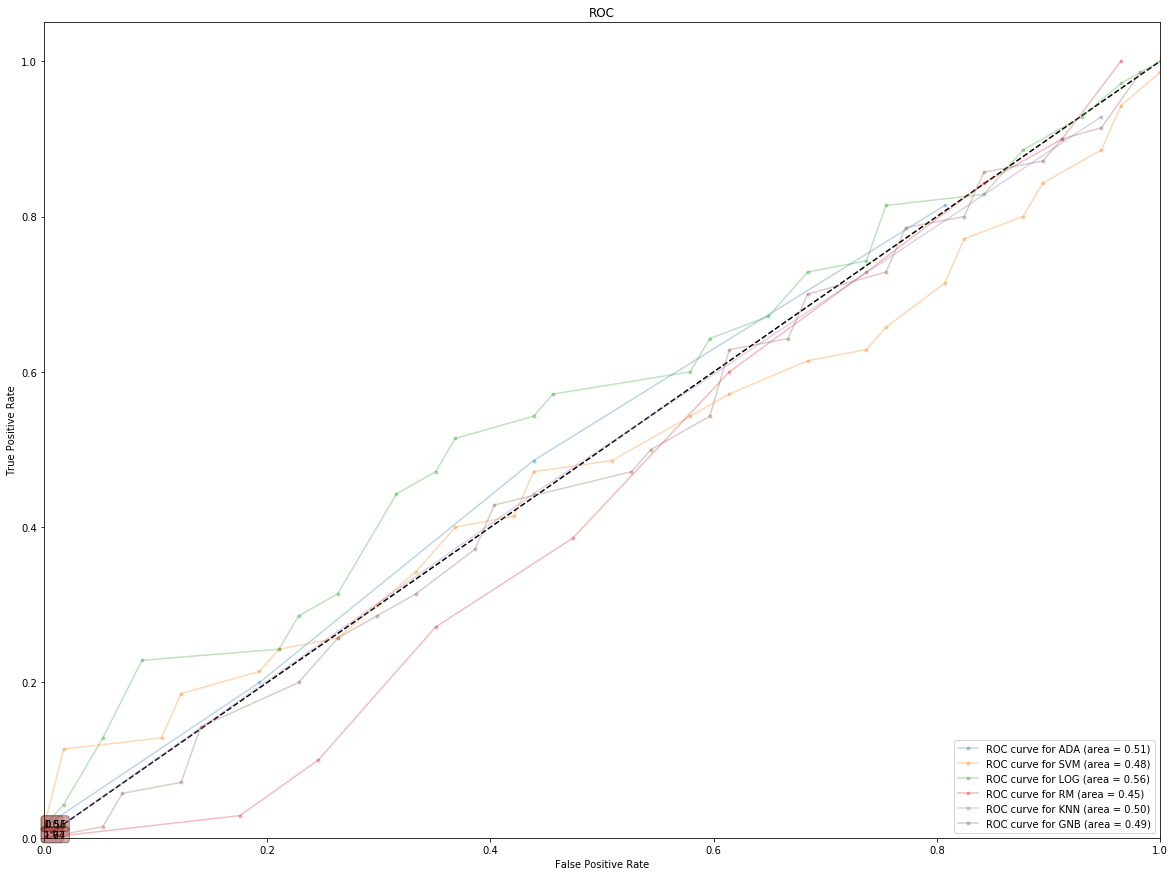

In [72]:
X_train, y_train, X_test, y_test=mask(DataTemp,["FTSE_Returns","NASDAQ_Returns","DJI_Returns"],'Target1', predict)
ada=cv_optimize(X_train, y_train, X_test, y_test,10, 'ADA',{'n_estimators':[10,20,50],'learning_rate':[0.8,1.0,1.2]})
log=cv_optimize(X_train, y_train, X_test, y_test, 10, 'LOG', {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]})
svm=cv_optimize(X_train, y_train, X_test, y_test, 10, 'SVM', {"C": [0.01, 0.1, 1.0, 10.0, 100.0]})
rm=cv_optimize(X_train, y_train, X_test, y_test, 10, 'RF', {"n_estimators": [10,20,50,100]})
knn=cv_optimize(X_train, y_train, X_test, y_test, 10, 'KNN', {"n_neighbors": [3,5,7,9,11,13]})
gnb=cv_optimize(X_train,y_train,X_test, y_test, 10,'GNB',[])
plt.subplots(figsize=(20,15))
with sns.hls_palette(8, l=.3, s=.8):
    ax=make_roc("ADA",ada, y_test, X_test, labe=100, skip=3,proba=True)
    make_roc("SVM",svm, y_test, X_test, ax,labe=100, skip=3,proba=False)
    make_roc("LOG",log, y_test, X_test, ax,labe=100, skip=3,proba=True)
    make_roc("RM",rm,y_test, X_test,ax,labe=100, skip=3,proba=True)
    make_roc("KNN",knn,y_test, X_test,ax,labe=100, skip=3,proba=True)
    make_roc("GNB",gnb,y_test, X_test,ax,labe=100, skip=3,proba=True)

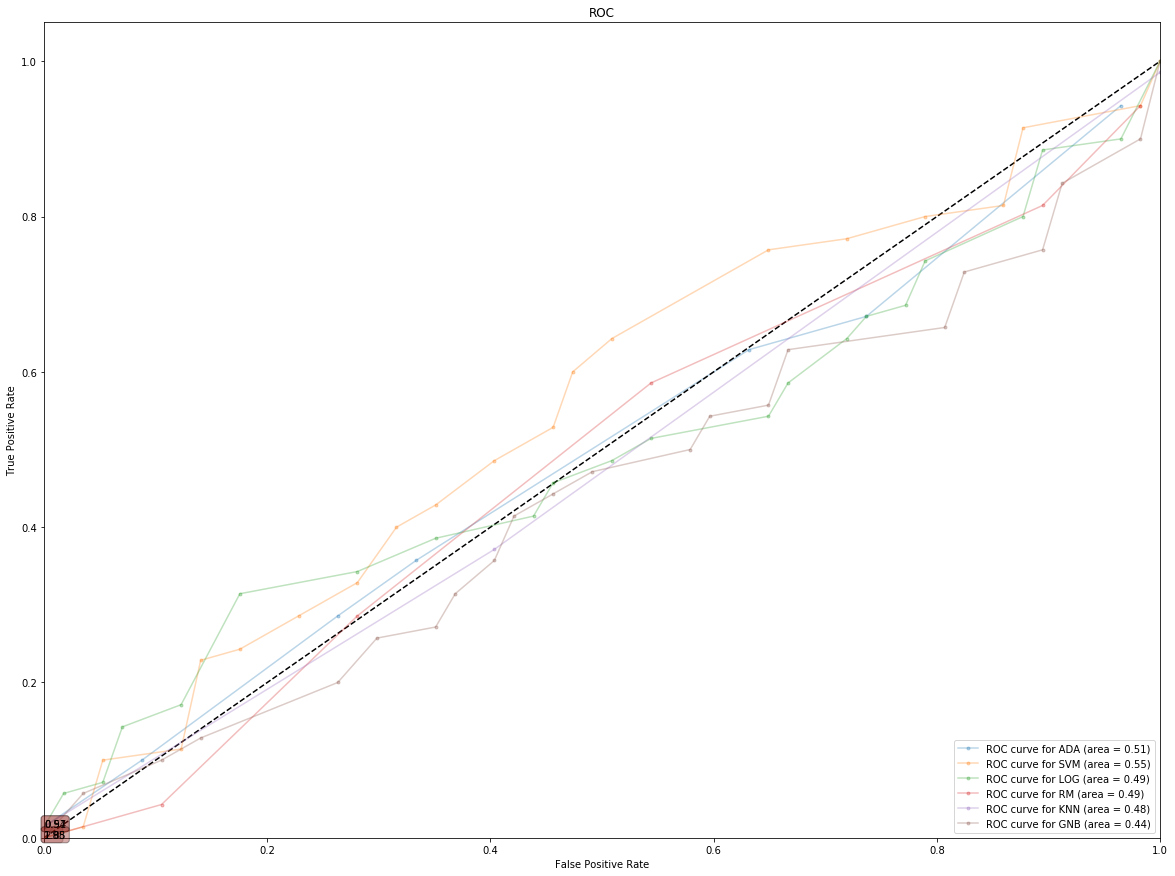

In [73]:
X_train, y_train, X_test, y_test=mask(DataTemp,["VIX_Returns","USDCNY_Returns","Gold_Returns"],'Target1', predict)
ada=cv_optimize(X_train, y_train, X_test, y_test,10, 'ADA',{'n_estimators':[10,20,50],'learning_rate':[0.8,1.0,1.2]})
log=cv_optimize(X_train, y_train, X_test, y_test, 10, 'LOG', {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]})
svm=cv_optimize(X_train, y_train, X_test, y_test, 10, 'SVM', {"C": [0.01, 0.1, 1.0, 10.0, 100.0]})
rm=cv_optimize(X_train, y_train, X_test, y_test, 10, 'RF', {"n_estimators": [10,20,50,100]})
knn=cv_optimize(X_train, y_train, X_test, y_test, 10, 'KNN', {"n_neighbors": [3,5,7,9,11,13]})
gnb=cv_optimize(X_train,y_train,X_test, y_test, 10,'GNB',[])
plt.subplots(figsize=(20,15))
with sns.hls_palette(8, l=.3, s=.8):
    ax=make_roc("ADA",ada, y_test, X_test, labe=100, skip=3,proba=True)
    make_roc("SVM",svm, y_test, X_test, ax,labe=100, skip=3,proba=False)
    make_roc("LOG",log, y_test, X_test, ax,labe=100, skip=3,proba=True)
    make_roc("RM",rm,y_test, X_test,ax,labe=100, skip=3,proba=True)
    make_roc("KNN",knn,y_test, X_test,ax,labe=100, skip=3,proba=True)
    make_roc("GNB",gnb,y_test, X_test,ax,labe=100, skip=3,proba=True)

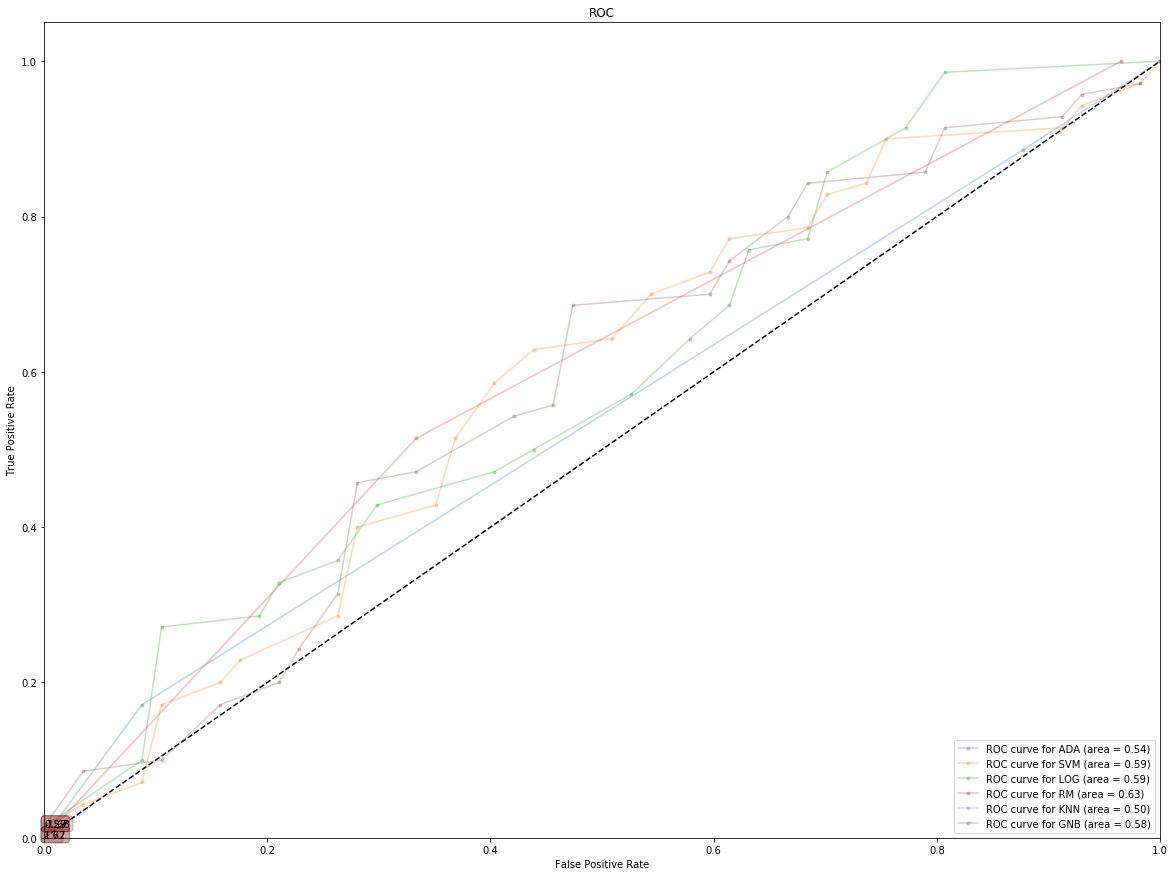

In [74]:
X_train, y_train, X_test, y_test=mask(DataTemp,['Open', 'High', 'Low', 'STOD', 'RSI','MA_10', 'MA_5','EMA_10', 'EMA_7','FTSE_Returns','NASDAQ_Returns','DJI_Returns'],'Target1', predict)
ada=cv_optimize(X_train, y_train, X_test, y_test,10, 'ADA',{'n_estimators':[10,20,50],'learning_rate':[0.8,1.0,1.2]})
log=cv_optimize(X_train, y_train, X_test, y_test, 10, 'LOG', {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]})
svm=cv_optimize(X_train, y_train, X_test, y_test, 10, 'SVM', {"C": [0.01, 0.1, 1.0, 10.0, 100.0]})
rm=cv_optimize(X_train, y_train, X_test, y_test, 10, 'RF', {"n_estimators": [10,20,50,100]})
knn=cv_optimize(X_train, y_train, X_test, y_test, 10, 'KNN', {"n_neighbors": [3,5,7,9,11,13]})
gnb=cv_optimize(X_train,y_train,X_test, y_test, 10,'GNB',[])
plt.subplots(figsize=(20,15))
with sns.hls_palette(8, l=.3, s=.8):
    ax=make_roc("ADA",ada, y_test, X_test, labe=100, skip=3,proba=True)
    make_roc("SVM",svm, y_test, X_test, ax,labe=100, skip=3,proba=False)
    make_roc("LOG",log, y_test, X_test, ax,labe=100, skip=3,proba=True)
    make_roc("RM",rm,y_test, X_test,ax,labe=100, skip=3,proba=True)
    make_roc("KNN",knn,y_test, X_test,ax,labe=100, skip=3,proba=True)
    make_roc("GNB",gnb,y_test, X_test,ax,labe=100, skip=3,proba=True)

# Lable 2 : Open

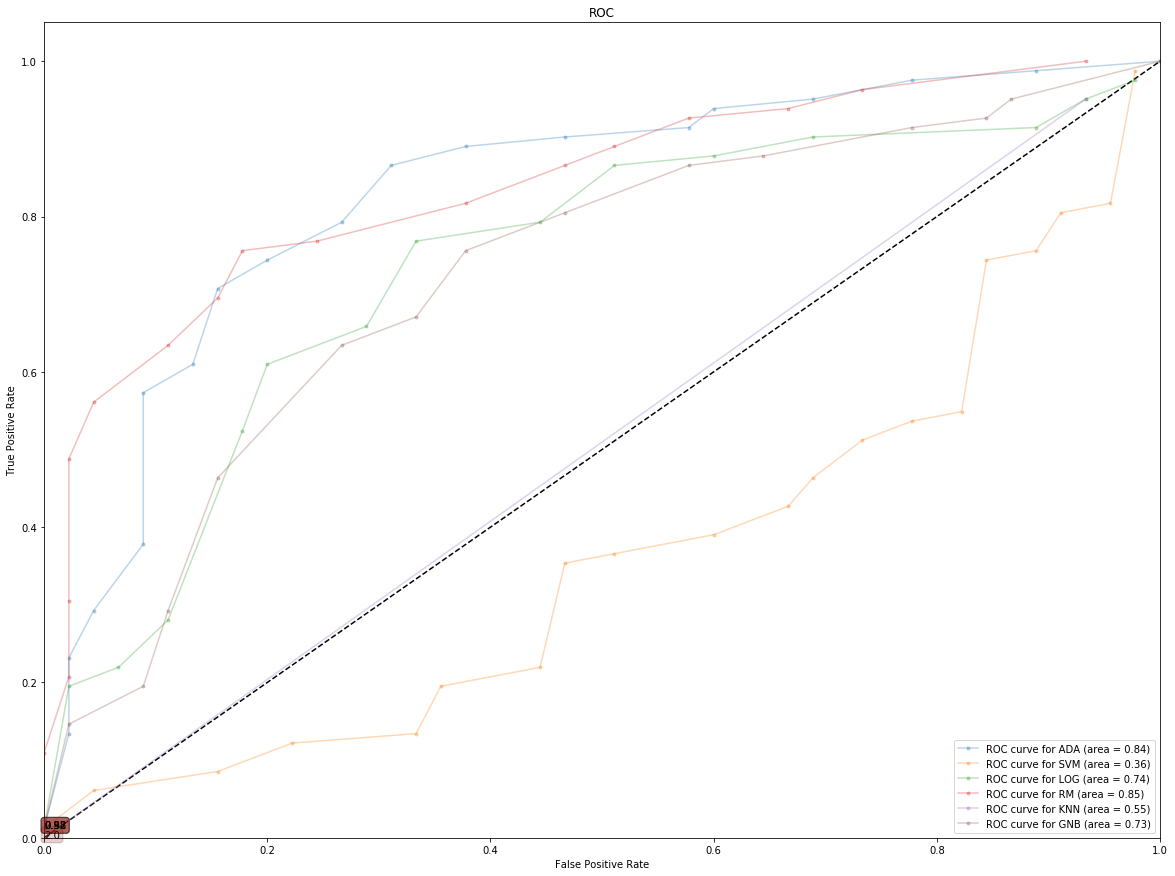

In [76]:
X_train, y_train, X_test, y_test=mask(DataTemp,['Open', 'High', 'Low', 'Volume', 'STOK', 'STOD', 'RSI', 'CCI_20',
       'CCI_10', 'ACCDIST', 'MOM_3', 'MOM_5', 'ROC_3', 'ROC_5', 'ROC_7',
       'MA_10', 'MA_5', 'FI', 'EMA_10', 'EMA_7', 'EOM', 'STDDEV_10',
       'STDDEV_21', 'Chaikin', 'Open_Change', 'High_Change', 'Volume_Change',
       'Low_Change', 'SP_Returns', 'FTSE_Returns', 'NIKKEI_Returns',
       'DJI_Returns', 'NASDAQ_Returns', 'CAC_Returns', 'HSI_Returns',
       'AXJO_Returns', 'USDJPY_Returns', 'USDCNY_Returns', 'USDGBP_Returns',
       'USDEUR_Returns', 'Gold_Returns', 'Oil_Returns', 'VIX_Returns',
       'SSE_Returns'],'Target2', predict)
ada=cv_optimize(X_train, y_train, X_test, y_test,10, 'ADA',{'n_estimators':[10,20,50],'learning_rate':[0.8,1.0,1.2]})
log=cv_optimize(X_train, y_train, X_test, y_test, 10, 'LOG', {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]})
svm=cv_optimize(X_train, y_train, X_test, y_test, 10, 'SVM', {"C": [0.01, 0.1, 1.0, 10.0, 100.0]})
rm=cv_optimize(X_train, y_train, X_test, y_test, 10, 'RF', {"n_estimators": [10,20,50,100]})
knn=cv_optimize(X_train, y_train, X_test, y_test, 10, 'KNN', {"n_neighbors": [3,5,7,9,11,13]})
gnb=cv_optimize(X_train,y_train,X_test, y_test, 10,'GNB',[])
plt.subplots(figsize=(20,15))
with sns.hls_palette(8, l=.3, s=.8):
    ax=make_roc("ADA",ada, y_test, X_test, labe=100, skip=3,proba=True)
    make_roc("SVM",svm, y_test, X_test, ax,labe=100, skip=3,proba=False)
    make_roc("LOG",log, y_test, X_test, ax,labe=100, skip=3,proba=True)
    make_roc("RM",rm,y_test, X_test,ax,labe=100, skip=3,proba=True)
    make_roc("KNN",knn,y_test, X_test,ax,labe=100, skip=3,proba=True)
    make_roc("GNB",gnb,y_test, X_test,ax,labe=100, skip=3,proba=True)

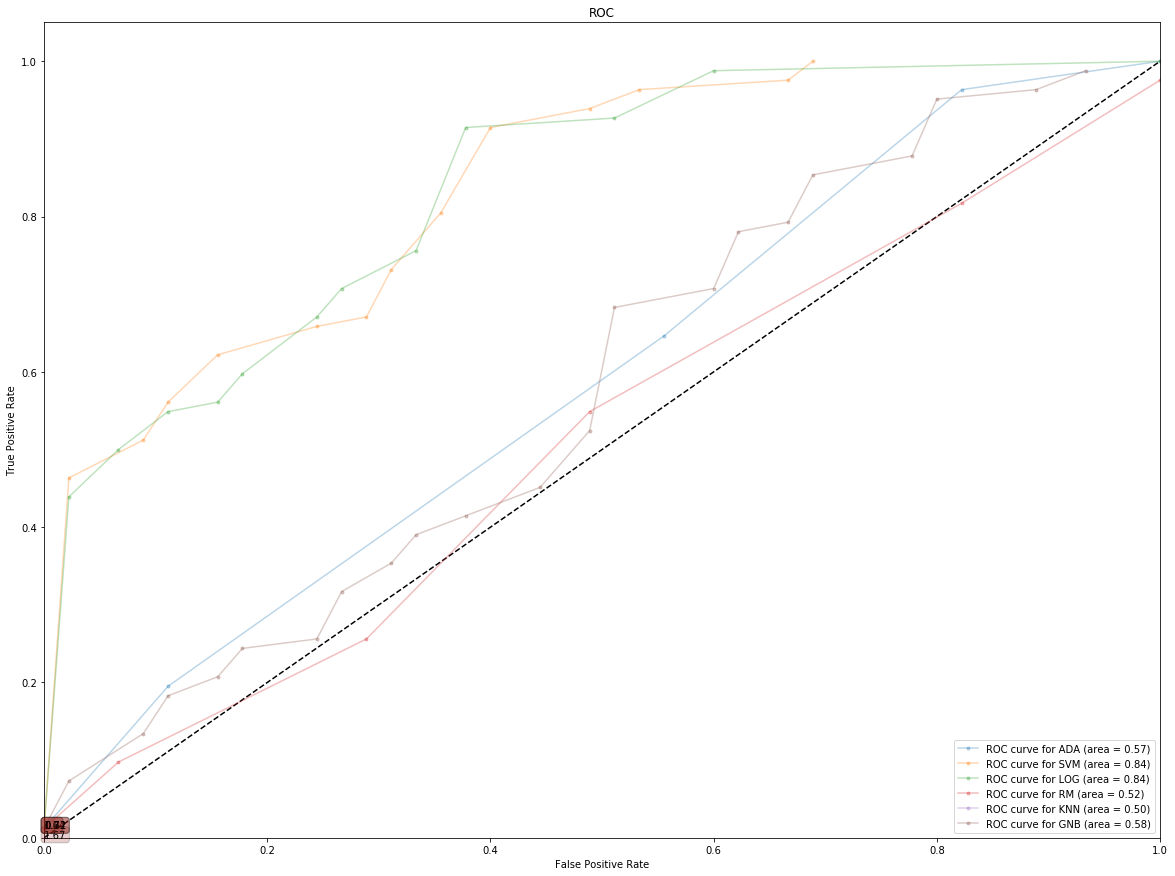

In [77]:
X_train, y_train, X_test, y_test=mask(DataTemp,['Open', 'High', 'Low', 'STOD', 'RSI','MA_10', 'MA_5','EMA_10', 'EMA_7'],'Target2', predict)
ada=cv_optimize(X_train, y_train, X_test, y_test,10, 'ADA',{'n_estimators':[10,20,50],'learning_rate':[0.8,1.0,1.2]})
log=cv_optimize(X_train, y_train, X_test, y_test, 10, 'LOG', {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]})
svm=cv_optimize(X_train, y_train, X_test, y_test, 10, 'SVM', {"C": [0.01, 0.1, 1.0, 10.0, 100.0]})
rm=cv_optimize(X_train, y_train, X_test, y_test, 10, 'RF', {"n_estimators": [10,20,50,100]})
knn=cv_optimize(X_train, y_train, X_test, y_test, 10, 'KNN', {"n_neighbors": [3,5,7,9,11,13]})
gnb=cv_optimize(X_train,y_train,X_test, y_test, 10,'GNB',[])
plt.subplots(figsize=(20,15))
with sns.hls_palette(8, l=.3, s=.8):
    ax=make_roc("ADA",ada, y_test, X_test, labe=100, skip=3,proba=True)
    make_roc("SVM",svm, y_test, X_test, ax,labe=100, skip=3,proba=False)
    make_roc("LOG",log, y_test, X_test, ax,labe=100, skip=3,proba=True)
    make_roc("RM",rm,y_test, X_test,ax,labe=100, skip=3,proba=True)
    make_roc("KNN",knn,y_test, X_test,ax,labe=100, skip=3,proba=True)
    make_roc("GNB",gnb,y_test, X_test,ax,labe=100, skip=3,proba=True)

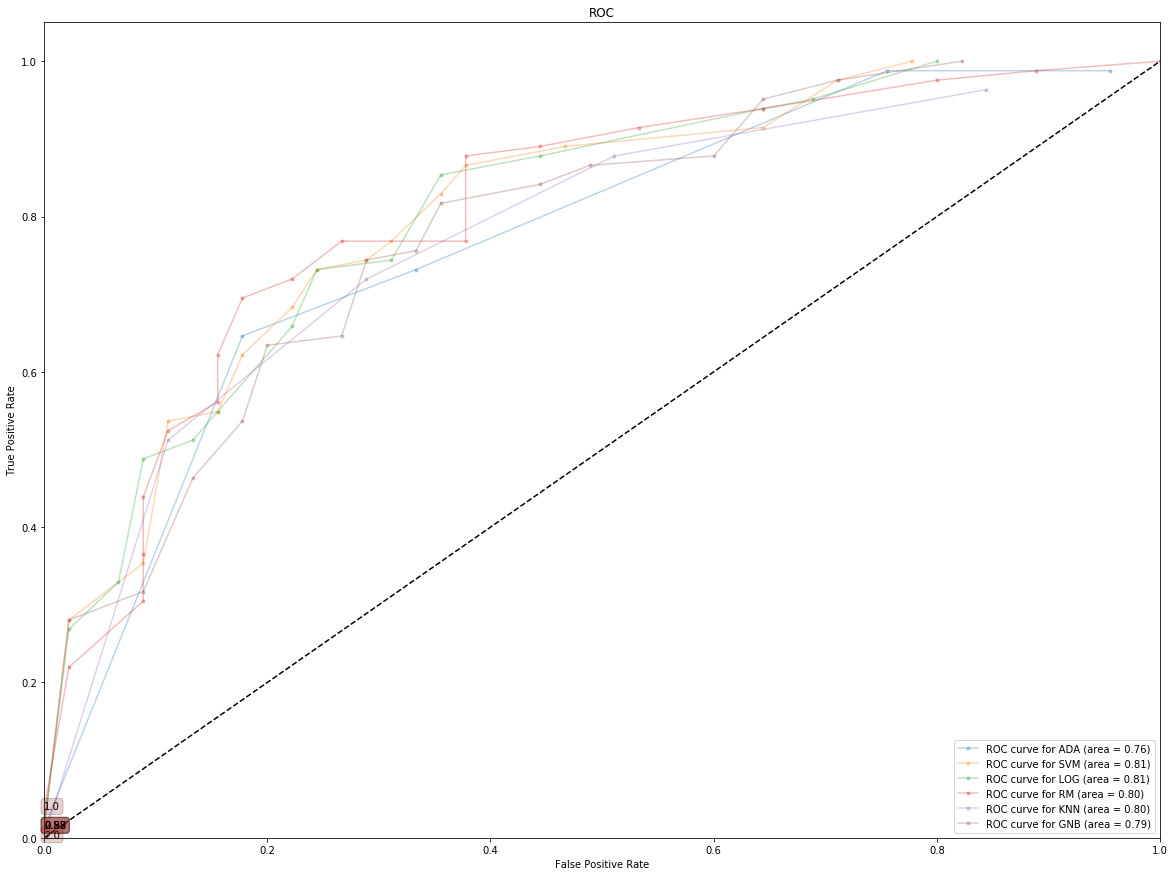

In [78]:
X_train, y_train, X_test, y_test=mask(DataTemp,["FTSE_Returns","NASDAQ_Returns","DJI_Returns"],'Target2', predict)
ada=cv_optimize(X_train, y_train, X_test, y_test,10, 'ADA',{'n_estimators':[10,20,50],'learning_rate':[0.8,1.0,1.2]})
log=cv_optimize(X_train, y_train, X_test, y_test, 10, 'LOG', {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]})
svm=cv_optimize(X_train, y_train, X_test, y_test, 10, 'SVM', {"C": [0.01, 0.1, 1.0, 10.0, 100.0]})
rm=cv_optimize(X_train, y_train, X_test, y_test, 10, 'RF', {"n_estimators": [10,20,50,100]})
knn=cv_optimize(X_train, y_train, X_test, y_test, 10, 'KNN', {"n_neighbors": [3,5,7,9,11,13]})
gnb=cv_optimize(X_train,y_train,X_test, y_test, 10,'GNB',[])
plt.subplots(figsize=(20,15))
with sns.hls_palette(8, l=.3, s=.8):
    ax=make_roc("ADA",ada, y_test, X_test, labe=100, skip=3,proba=True)
    make_roc("SVM",svm, y_test, X_test, ax,labe=100, skip=3,proba=False)
    make_roc("LOG",log, y_test, X_test, ax,labe=100, skip=3,proba=True)
    make_roc("RM",rm,y_test, X_test,ax,labe=100, skip=3,proba=True)
    make_roc("KNN",knn,y_test, X_test,ax,labe=100, skip=3,proba=True)
    make_roc("GNB",gnb,y_test, X_test,ax,labe=100, skip=3,proba=True)

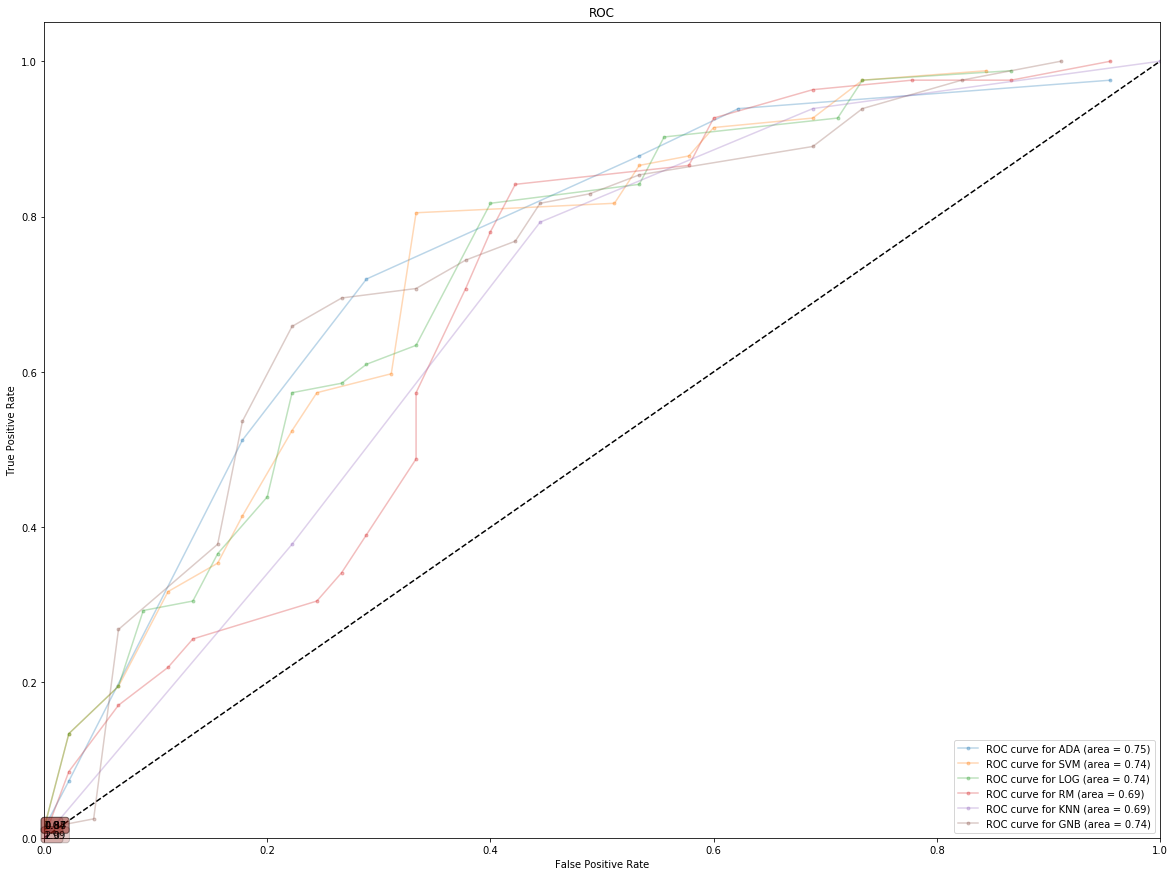

In [79]:
X_train, y_train, X_test, y_test=mask(DataTemp,["VIX_Returns","USDCNY_Returns","Gold_Returns"],'Target2', predict)
ada=cv_optimize(X_train, y_train, X_test, y_test,10, 'ADA',{'n_estimators':[10,20,50],'learning_rate':[0.8,1.0,1.2]})
log=cv_optimize(X_train, y_train, X_test, y_test, 10, 'LOG', {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]})
svm=cv_optimize(X_train, y_train, X_test, y_test, 10, 'SVM', {"C": [0.01, 0.1, 1.0, 10.0, 100.0]})
rm=cv_optimize(X_train, y_train, X_test, y_test, 10, 'RF', {"n_estimators": [10,20,50,100]})
knn=cv_optimize(X_train, y_train, X_test, y_test, 10, 'KNN', {"n_neighbors": [3,5,7,9,11,13]})
gnb=cv_optimize(X_train,y_train,X_test, y_test, 10,'GNB',[])
plt.subplots(figsize=(20,15))
with sns.hls_palette(8, l=.3, s=.8):
    ax=make_roc("ADA",ada, y_test, X_test, labe=100, skip=3,proba=True)
    make_roc("SVM",svm, y_test, X_test, ax,labe=100, skip=3,proba=False)
    make_roc("LOG",log, y_test, X_test, ax,labe=100, skip=3,proba=True)
    make_roc("RM",rm,y_test, X_test,ax,labe=100, skip=3,proba=True)
    make_roc("KNN",knn,y_test, X_test,ax,labe=100, skip=3,proba=True)
    make_roc("GNB",gnb,y_test, X_test,ax,labe=100, skip=3,proba=True)

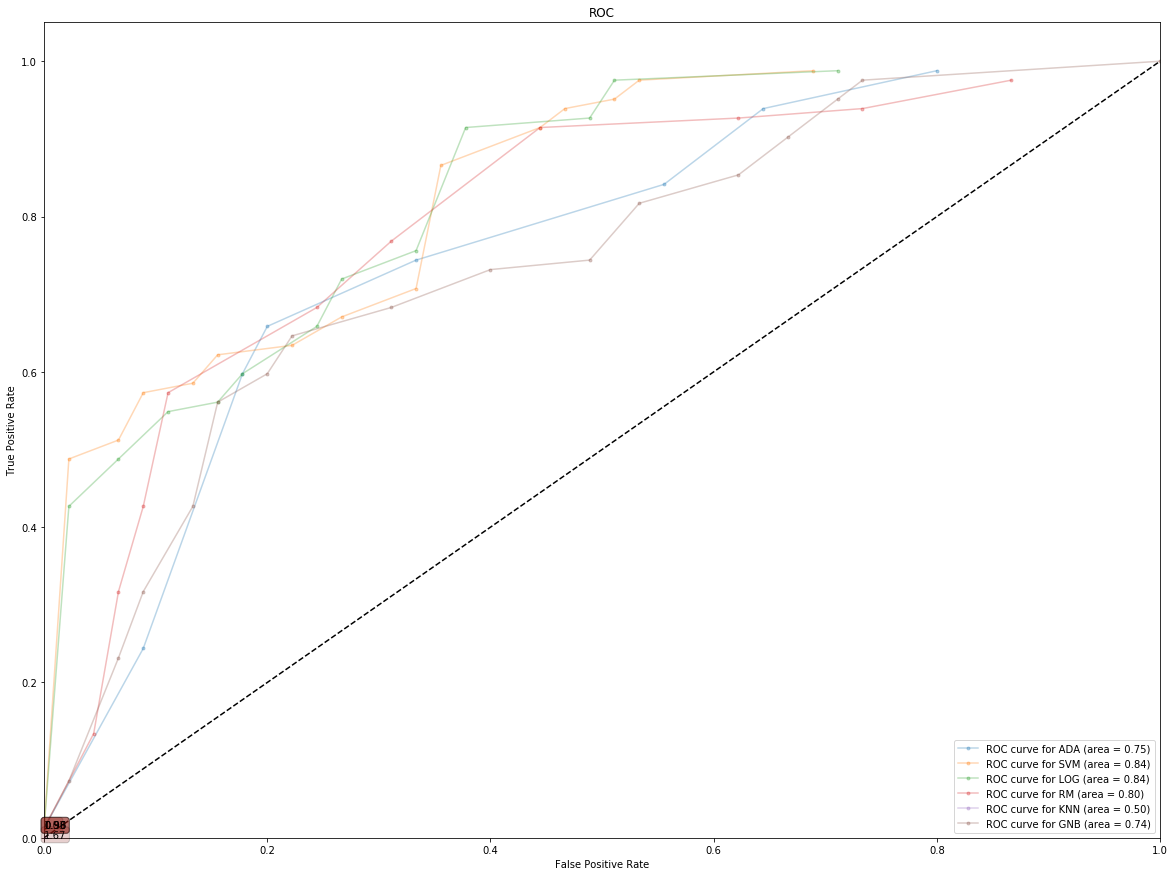

In [80]:
X_train, y_train, X_test, y_test=mask(DataTemp,['Open', 'High', 'Low', 'STOD', 'RSI','MA_10', 'MA_5','EMA_10', 'EMA_7','FTSE_Returns','NASDAQ_Returns','DJI_Returns'],'Target2', predict)
ada=cv_optimize(X_train, y_train, X_test, y_test,10, 'ADA',{'n_estimators':[10,20,50],'learning_rate':[0.8,1.0,1.2]})
log=cv_optimize(X_train, y_train, X_test, y_test, 10, 'LOG', {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]})
svm=cv_optimize(X_train, y_train, X_test, y_test, 10, 'SVM', {"C": [0.01, 0.1, 1.0, 10.0, 100.0]})
rm=cv_optimize(X_train, y_train, X_test, y_test, 10, 'RF', {"n_estimators": [10,20,50,100]})
knn=cv_optimize(X_train, y_train, X_test, y_test, 10, 'KNN', {"n_neighbors": [3,5,7,9,11,13]})
gnb=cv_optimize(X_train,y_train,X_test, y_test, 10,'GNB',[])
plt.subplots(figsize=(20,15))
with sns.hls_palette(8, l=.3, s=.8):
    ax=make_roc("ADA",ada, y_test, X_test, labe=100, skip=3,proba=True)
    make_roc("SVM",svm, y_test, X_test, ax,labe=100, skip=3,proba=False)
    make_roc("LOG",log, y_test, X_test, ax,labe=100, skip=3,proba=True)
    make_roc("RM",rm,y_test, X_test,ax,labe=100, skip=3,proba=True)
    make_roc("KNN",knn,y_test, X_test,ax,labe=100, skip=3,proba=True)
    make_roc("GNB",gnb,y_test, X_test,ax,labe=100, skip=3,proba=True)

# Label 3: Returns

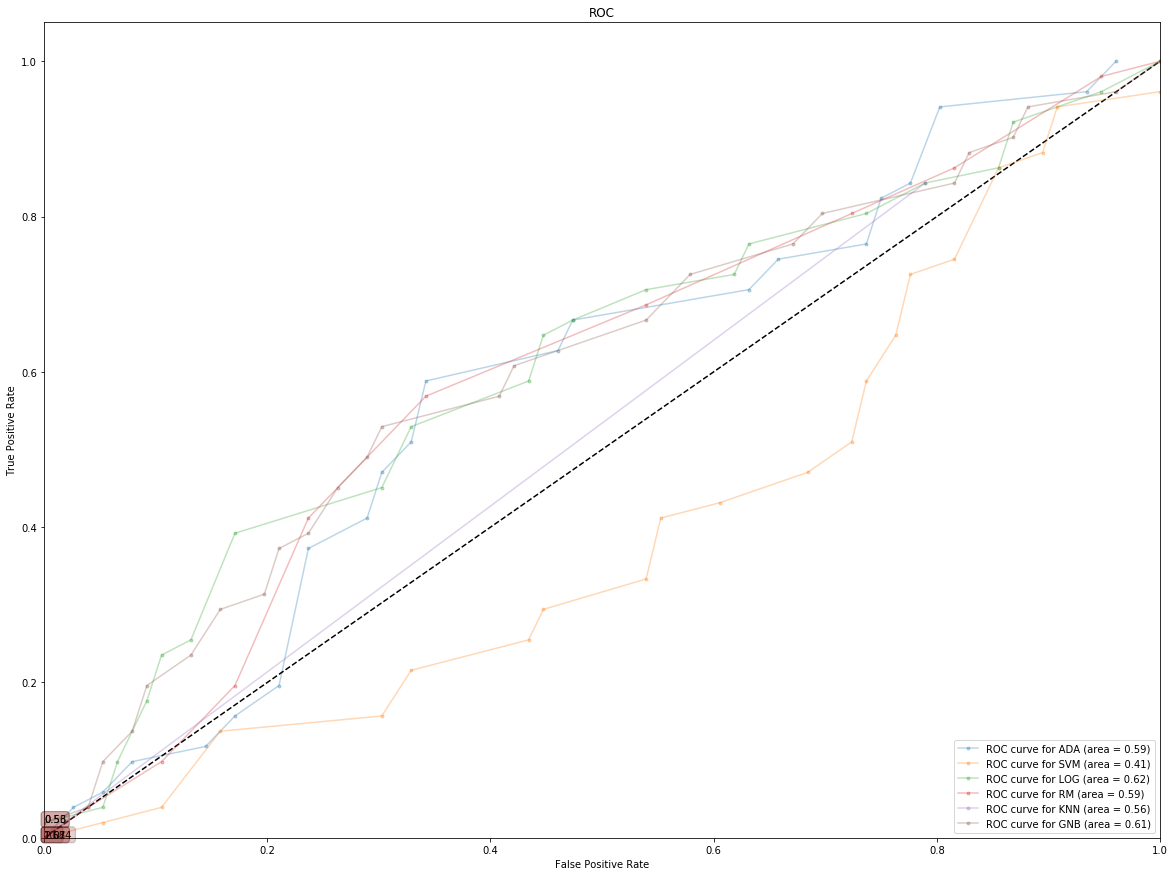

In [83]:
X_train, y_train, X_test, y_test=mask(DataTemp,['Open', 'High', 'Low', 'Volume', 'STOK', 'STOD', 'RSI', 'CCI_20',
       'CCI_10', 'ACCDIST', 'MOM_3', 'MOM_5', 'ROC_3', 'ROC_5', 'ROC_7',
       'MA_10', 'MA_5', 'FI', 'EMA_10', 'EMA_7', 'EOM', 'STDDEV_10',
       'STDDEV_21', 'Chaikin', 'Open_Change', 'High_Change', 'Volume_Change',
       'Low_Change', 'SP_Returns', 'FTSE_Returns', 'NIKKEI_Returns',
       'DJI_Returns', 'NASDAQ_Returns', 'CAC_Returns', 'HSI_Returns',
       'AXJO_Returns', 'USDJPY_Returns', 'USDCNY_Returns', 'USDGBP_Returns',
       'USDEUR_Returns', 'Gold_Returns', 'Oil_Returns', 'VIX_Returns',
       'SSE_Returns'],'Target3', predict)
ada=cv_optimize(X_train, y_train, X_test, y_test,10, 'ADA',{'n_estimators':[10,20,50],'learning_rate':[0.8,1.0,1.2]})
log=cv_optimize(X_train, y_train, X_test, y_test, 10, 'LOG', {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]})
svm=cv_optimize(X_train, y_train, X_test, y_test, 10, 'SVM', {"C": [0.01, 0.1, 1.0, 10.0, 100.0]})
rm=cv_optimize(X_train, y_train, X_test, y_test, 10, 'RF', {"n_estimators": [10,20,50,100]})
knn=cv_optimize(X_train, y_train, X_test, y_test, 10, 'KNN', {"n_neighbors": [3,5,7,9,11,13]})
gnb=cv_optimize(X_train,y_train,X_test, y_test, 10,'GNB',[])
plt.subplots(figsize=(20,15))
with sns.hls_palette(8, l=.3, s=.8):
    ax=make_roc("ADA",ada, y_test, X_test, labe=100, skip=3,proba=True)
    make_roc("SVM",svm, y_test, X_test, ax,labe=100, skip=3,proba=False)
    make_roc("LOG",log, y_test, X_test, ax,labe=100, skip=3,proba=True)
    make_roc("RM",rm,y_test, X_test,ax,labe=100, skip=3,proba=True)
    make_roc("KNN",knn,y_test, X_test,ax,labe=100, skip=3,proba=True)
    make_roc("GNB",gnb,y_test, X_test,ax,labe=100, skip=3,proba=True)

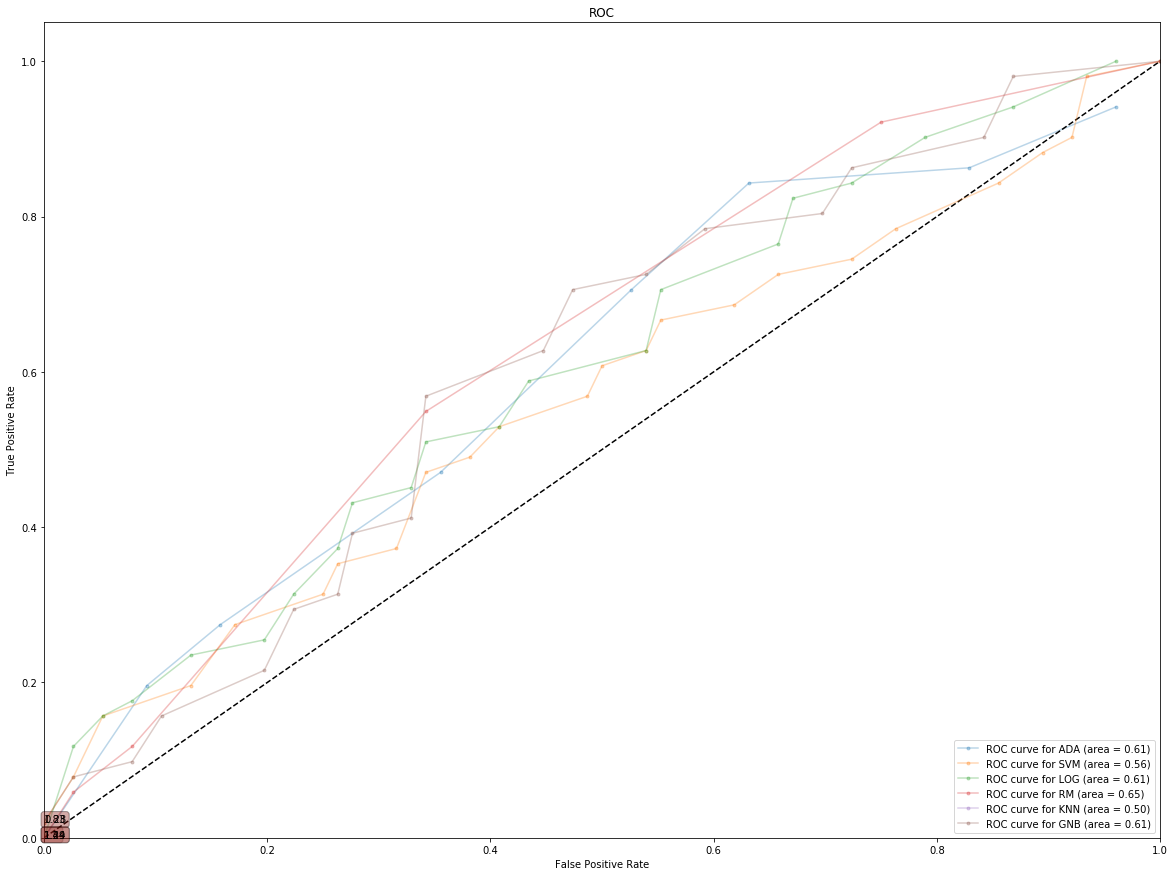

In [84]:
X_train, y_train, X_test, y_test=mask(DataTemp,['Open', 'High', 'Low', 'STOD', 'RSI','MA_10', 'MA_5','EMA_10', 'EMA_7'],'Target3', predict)
ada=cv_optimize(X_train, y_train, X_test, y_test,10, 'ADA',{'n_estimators':[10,20,50],'learning_rate':[0.8,1.0,1.2]})
log=cv_optimize(X_train, y_train, X_test, y_test, 10, 'LOG', {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]})
svm=cv_optimize(X_train, y_train, X_test, y_test, 10, 'SVM', {"C": [0.01, 0.1, 1.0, 10.0, 100.0]})
rm=cv_optimize(X_train, y_train, X_test, y_test, 10, 'RF', {"n_estimators": [10,20,50,100]})
knn=cv_optimize(X_train, y_train, X_test, y_test, 10, 'KNN', {"n_neighbors": [3,5,7,9,11,13]})
gnb=cv_optimize(X_train,y_train,X_test, y_test, 10,'GNB',[])
plt.subplots(figsize=(20,15))
with sns.hls_palette(8, l=.3, s=.8):
    ax=make_roc("ADA",ada, y_test, X_test, labe=100, skip=3,proba=True)
    make_roc("SVM",svm, y_test, X_test, ax,labe=100, skip=3,proba=False)
    make_roc("LOG",log, y_test, X_test, ax,labe=100, skip=3,proba=True)
    make_roc("RM",rm,y_test, X_test,ax,labe=100, skip=3,proba=True)
    make_roc("KNN",knn,y_test, X_test,ax,labe=100, skip=3,proba=True)
    make_roc("GNB",gnb,y_test, X_test,ax,labe=100, skip=3,proba=True)

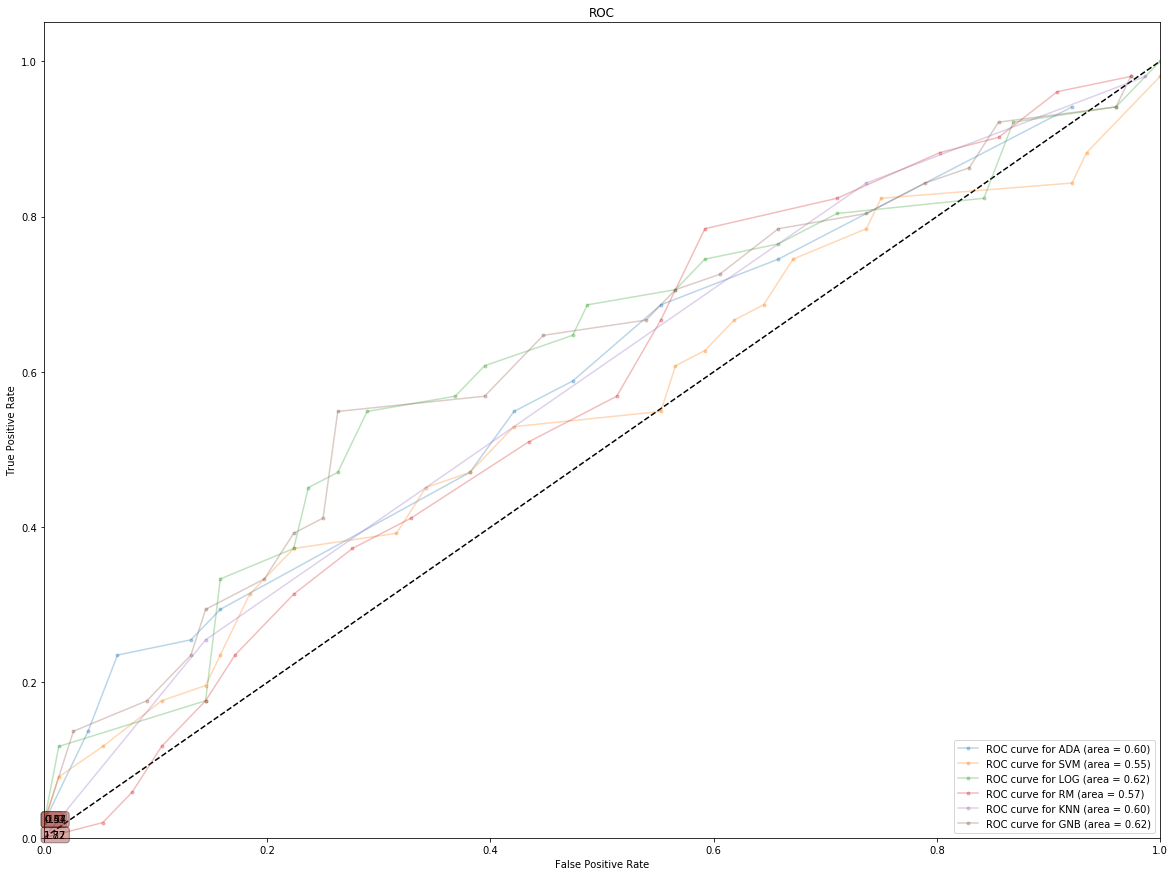

In [85]:
X_train, y_train, X_test, y_test=mask(DataTemp,["FTSE_Returns","NASDAQ_Returns","DJI_Returns"],'Target3', predict)
ada=cv_optimize(X_train, y_train, X_test, y_test,10, 'ADA',{'n_estimators':[10,20,50],'learning_rate':[0.8,1.0,1.2]})
log=cv_optimize(X_train, y_train, X_test, y_test, 10, 'LOG', {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]})
svm=cv_optimize(X_train, y_train, X_test, y_test, 10, 'SVM', {"C": [0.01, 0.1, 1.0, 10.0, 100.0]})
rm=cv_optimize(X_train, y_train, X_test, y_test, 10, 'RF', {"n_estimators": [10,20,50,100]})
knn=cv_optimize(X_train, y_train, X_test, y_test, 10, 'KNN', {"n_neighbors": [3,5,7,9,11,13]})
gnb=cv_optimize(X_train,y_train,X_test, y_test, 10,'GNB',[])
plt.subplots(figsize=(20,15))
with sns.hls_palette(8, l=.3, s=.8):
    ax=make_roc("ADA",ada, y_test, X_test, labe=100, skip=3,proba=True)
    make_roc("SVM",svm, y_test, X_test, ax,labe=100, skip=3,proba=False)
    make_roc("LOG",log, y_test, X_test, ax,labe=100, skip=3,proba=True)
    make_roc("RM",rm,y_test, X_test,ax,labe=100, skip=3,proba=True)
    make_roc("KNN",knn,y_test, X_test,ax,labe=100, skip=3,proba=True)
    make_roc("GNB",gnb,y_test, X_test,ax,labe=100, skip=3,proba=True)

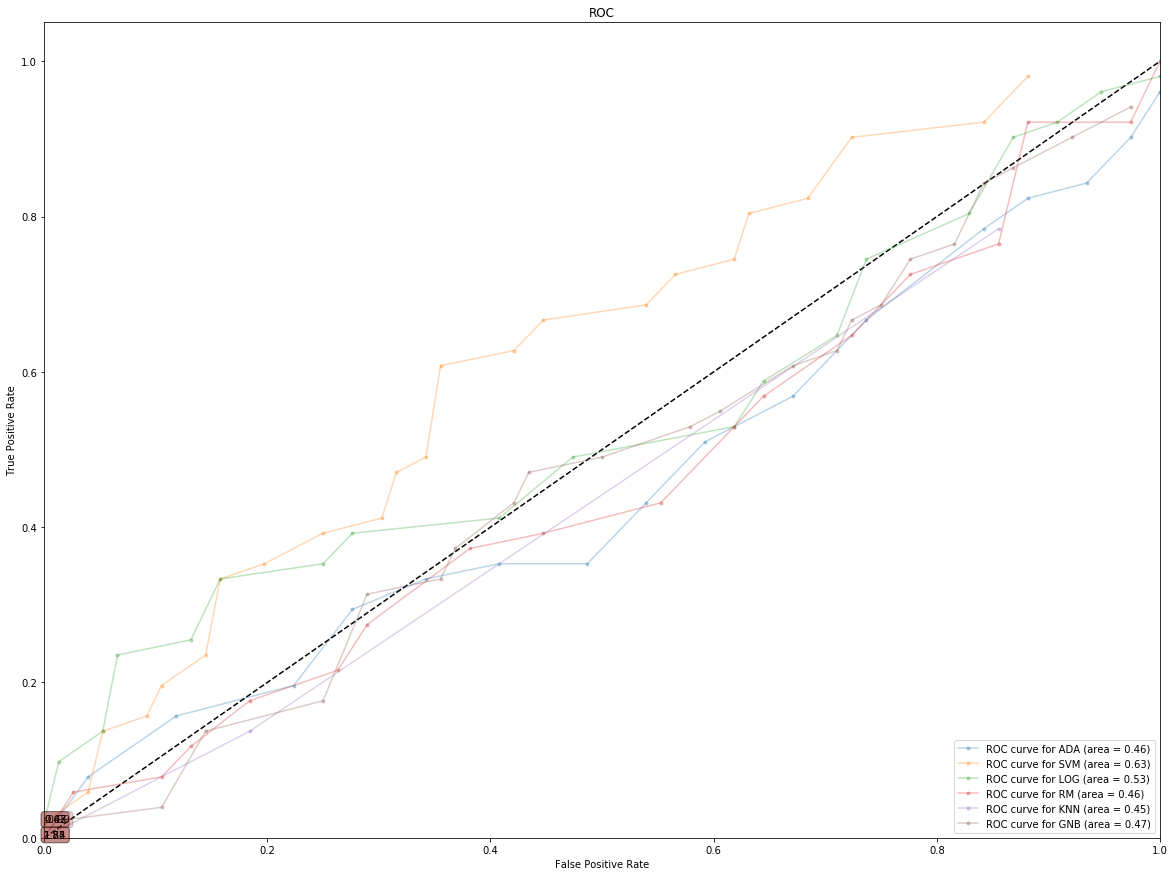

In [86]:
X_train, y_train, X_test, y_test=mask(DataTemp,["VIX_Returns","USDCNY_Returns","Gold_Returns"],'Target3', predict)
ada=cv_optimize(X_train, y_train, X_test, y_test,10, 'ADA',{'n_estimators':[10,20,50],'learning_rate':[0.8,1.0,1.2]})
log=cv_optimize(X_train, y_train, X_test, y_test, 10, 'LOG', {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]})
svm=cv_optimize(X_train, y_train, X_test, y_test, 10, 'SVM', {"C": [0.01, 0.1, 1.0, 10.0, 100.0]})
rm=cv_optimize(X_train, y_train, X_test, y_test, 10, 'RF', {"n_estimators": [10,20,50,100]})
knn=cv_optimize(X_train, y_train, X_test, y_test, 10, 'KNN', {"n_neighbors": [3,5,7,9,11,13]})
gnb=cv_optimize(X_train,y_train,X_test, y_test, 10,'GNB',[])
plt.subplots(figsize=(20,15))
with sns.hls_palette(8, l=.3, s=.8):
    ax=make_roc("ADA",ada, y_test, X_test, labe=100, skip=3,proba=True)
    make_roc("SVM",svm, y_test, X_test, ax,labe=100, skip=3,proba=False)
    make_roc("LOG",log, y_test, X_test, ax,labe=100, skip=3,proba=True)
    make_roc("RM",rm,y_test, X_test,ax,labe=100, skip=3,proba=True)
    make_roc("KNN",knn,y_test, X_test,ax,labe=100, skip=3,proba=True)
    make_roc("GNB",gnb,y_test, X_test,ax,labe=100, skip=3,proba=True)

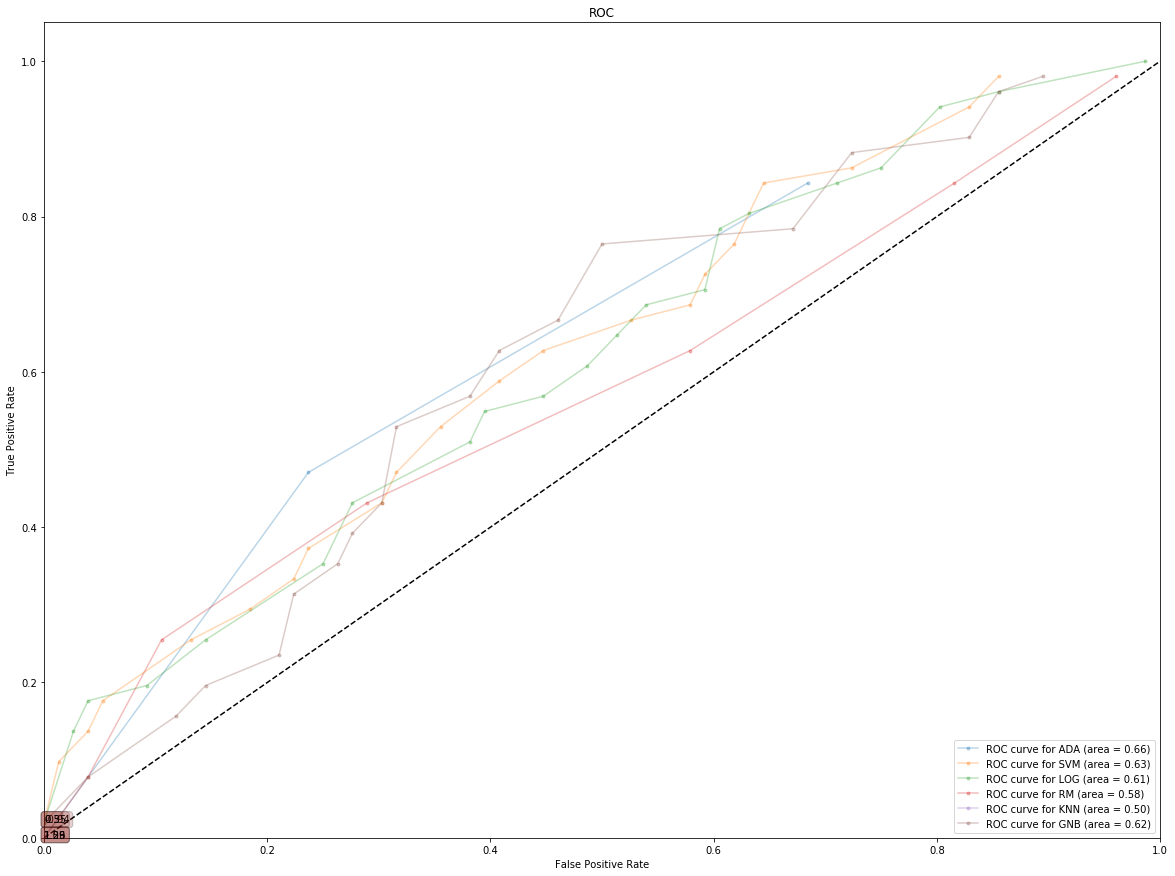

In [87]:
X_train, y_train, X_test, y_test=mask(DataTemp,['Open', 'High', 'Low', 'STOD', 'RSI','MA_10', 'MA_5','EMA_10', 'EMA_7','FTSE_Returns','NASDAQ_Returns','DJI_Returns'],'Target3', predict)
ada=cv_optimize(X_train, y_train, X_test, y_test,10, 'ADA',{'n_estimators':[10,20,50],'learning_rate':[0.8,1.0,1.2]})
log=cv_optimize(X_train, y_train, X_test, y_test, 10, 'LOG', {"C": [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]})
svm=cv_optimize(X_train, y_train, X_test, y_test, 10, 'SVM', {"C": [0.01, 0.1, 1.0, 10.0, 100.0]})
rm=cv_optimize(X_train, y_train, X_test, y_test, 10, 'RF', {"n_estimators": [10,20,50,100]})
knn=cv_optimize(X_train, y_train, X_test, y_test, 10, 'KNN', {"n_neighbors": [3,5,7,9,11,13]})
gnb=cv_optimize(X_train,y_train,X_test, y_test, 10,'GNB',[])
plt.subplots(figsize=(20,15))
with sns.hls_palette(8, l=.3, s=.8):
    ax=make_roc("ADA",ada, y_test, X_test, labe=100, skip=3,proba=True)
    make_roc("SVM",svm, y_test, X_test, ax,labe=100, skip=3,proba=False)
    make_roc("LOG",log, y_test, X_test, ax,labe=100, skip=3,proba=True)
    make_roc("RM",rm,y_test, X_test,ax,labe=100, skip=3,proba=True)
    make_roc("KNN",knn,y_test, X_test,ax,labe=100, skip=3,proba=True)
    make_roc("GNB",gnb,y_test, X_test,ax,labe=100, skip=3,proba=True)